<h1><center>What factors affect student performance?</center></h1>
<h1><center>Project: Predicting Student Test Scores</center></h1>
<h1><center>Data Science CSPB-3022 Project</center></h1>
</br>
<center><img src="https://i0.wp.com/www.additudemag.com/wp-content/uploads/2021/05/GettyImages-1210746752.jpg" style="height:250px" /><center>

<h3><center>by: Jessica Carpenter</center></h3>
<h3><center>Summer 2023</center></h3>


# Data Cleaning and Exploratory Data Analysis

## Project Topic, Description, Data Scource, and Goals


As a public school teacher (and soon to be computer scientist), I know that every student faces a unique set of influences that can affect his or her performance in school. Which aspects are most influential? Which factors can help a student succeed? Which factors can hinder performance? I would like to analyze data for students in a public school to study how personal and socio-economic factors interact with student perfomance.
<br> 
This project involves **predicting** how well a student will score on the basis their socio-economic and personal details. For this **classification** study, my goal is to build a function C(X) that takes as input the feature vector X and predicts its value for Y. The feature vector X is made up of 11 numeric and categorical predictors/features. Y is a qualitative response that takes values in a finite unordered set of pass or fail.  
<br>
* **Goals**:
<br>
On the basis of the training data, I would like to:
<br>
* Accurately predict test performance (pass or fail) of unseen test cases. It is valuable to have an estimate of the probablity that a student will pass, in addition to a binary classification of pass or fail. 
* Understand which predictors affect the outcome.  
* Assess the quality of predictions.
* Determine if test preparation is effective.
* Find patterns in interactions.
* Identify which interacting features have an effect scores.
<br>

### Bonus
I originally planned to implement a bonus section by training my models on real data from the school at which I am employed. However, I am worried that time will be an issue as this project is already very involved. I may come back later to complete the bonus when I have buttoned up the rest of the required pieces. 

### Data Source and Description

This project uses the *"Student Exam Scores: Extended Dataset"* from Kaggle. https://www.kaggle.com/datasets/desalegngeb/students-exam-scores
<br>
This dataset includes exam scores in three subject test areas(Math, Reading, Writing) from students at a public school, and it includes a variety of personal and socio-economic factors that may have an interaction effects upon these exam scores. The dataset is in the form of a CSV file with 11 predictoring features and 3 output variables (the test scores). This data is from a fictional public school, and it uses fictional students, however the dataset is based around real public school data. 
<br>
Original data set author:
Kimmons, Royce (2022). *"Student Exam Scores"*. http://roycekimmons.com/tools/generated_data/exams

### Real World Application


Title I is a federal education program that provides support to low income students and schools. This type of funding can be used to meet the educational needs of students living at or near the poverty line. Additionally, the No Child Left Behind law requires schools to show growth test scores for all students. I would like to use this data to explore factors affect education, and investigate factors that influence test scores.\
For more information on Title 1: \
https://www2.ed.gov/programs/titleiparta/index.html \
For more information on No Child Left Behind: \
https://www2.ed.gov/nclb/landing.jhtml \

## Exploration of Data and Initial Analysis

In this section, I will examine my data set.
<br>
<br>
**Goals for Cleaning and Exploratory Analysis**:
<br>
* What does the data look like? 
* How big is it?
* How many features does it have?  
* What types of data are included?
* Do any features need dropped because they are not relevant to my goal?
* Are there null values that need addressed?
<br>

### Exploring the Data Set 

In [1]:
# import libraries I'll need for this project
# I'll use some of these for my initial analysis

%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
# sns.set() sets the color map to have a light blue background
import seaborn as sns; sns.set()
import patsy
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2 
from sklearn import linear_model
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
import sklearn.neighbors as neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn import over_sampling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
import tensorflow as tf
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

2023-08-14 01:01:47.016332: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-14 01:01:47.019462: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-14 01:01:47.071583: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-14 01:01:47.072767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 01:01:48.203127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# read data st into a data frame
#data = pd.read_csv('./Expanded_data_with_more_features.csv', header=None, na_values=['?'])
data = pd.read_csv('./Expanded_data_with_more_features.csv', na_values=['?'])

In [3]:
# look at the first ten rows to see what we are dealing with
data.head()

Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

In [4]:
# remove extra unnamed beginning row to make it easier to work with 
data = data.drop('Unnamed: 0', axis=1)
data.head()

Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

In [5]:
# check what types of data there are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


### Data Feature Analysis

This dataset has a mix of attribute types; it has 10 objects types and 1 float type, and 3 ints. The data set is composed of continuous, nominal, ordinal, interval, and categorical values. Some values are missing, so that will need to be addressed in the data cleaning and preproccessing. \
There are 30642 total data objects with 15 predicting factors.
<br>
<u> this is underlined </u>
*As part of my data exploration with this set, I will first evaluate the factors.\
*Type and Name of Factors  <br>
1. <u>Gender</u>: (*categorica/dichotomous*) Gender of the student (male/female)
2. <u>EthnicGroup</u>: (*categorical/nominal*) Ethnic group of the student (group A to E)
3. <u>ParentEduc</u>: (*categorical/ordinal*) Parent(s) education background (from some_highschool to master's degree)
4. <u>LunchType</u>: (*categorica/dichotomous*) School lunch type (standard or free/reduced)
5. <u>TestPrep</u>: (*categorica/dichotomous*) Test preparation course followed (completed or none)
6. <u>ParentMaritalStatus</u>: (*categorical/nominal*) Parent(s) marital status (married/single/widowed/divorced)
7. <u>PracticeSport</u>: (*categorical/ordinal*) How often the student parctice sport (never/sometimes/regularly))
8. <u>IsFirstChild</u>: (*categorica/dichotomous*) If the child is first child in the family or not (yes/no)
9. <u>NrSiblings</u>: (*continuous/interval*) Number of siblings the student has (0 to 7)
10. <u>TransportMeans</u>: (*categorica/dichotomous*) Means of transport to school (schoolbus/private)
11. <u>WklyStudyHours</u>: (*categorical/ordinal*) Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
12. <u>MathScore</u>: (*continuous/ratio*) math test score(0-100)
13. <u>ReadingScore</u>: (*continuous/ratio*) reading test score(0-100)
14. <u>WritingScore</u>: (*continuous/ratio*) writing test score(0-100)


### Exploration of Data Values and Data Types
I will use this section to explore the values and data types, and to check each column for missing values. \
Reference if this if necessary, otherwise feel free to continue to the EDA section. 

In [6]:
data.loc[:, "Gender"].head()

0    female
1    female
2    female
3      male
4      male
Name: Gender, dtype: object

In [7]:
data["Gender"].isnull().values.any()

False

In [8]:
data.loc[:, "EthnicGroup"].head()
data.loc[:, "EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
data["EthnicGroup"].isnull().values.any()

True

In [10]:
data.loc[:, "ParentEduc"].head()

0     bachelor's degree
1          some college
2       master's degree
3    associate's degree
4          some college
Name: ParentEduc, dtype: object

In [11]:
data["ParentEduc"].isnull().values.any()

True

In [12]:
data.loc[:, "LunchType"].head()

0        standard
1        standard
2        standard
3    free/reduced
4        standard
Name: LunchType, dtype: object

In [13]:
data["LunchType"].isnull().values.any()

False

In [14]:
data.loc[:, "TestPrep"].head()

0    none
1     NaN
2    none
3    none
4    none
Name: TestPrep, dtype: object

In [15]:
data["TestPrep"].isnull().values.any()

True

In [16]:
data.loc[:, "ParentMaritalStatus"].head()

0    married
1    married
2     single
3    married
4    married
Name: ParentMaritalStatus, dtype: object

In [17]:
data["ParentMaritalStatus"].isnull().values.any()

True

In [18]:
data.loc[:, "PracticeSport"].head()

0    regularly
1    sometimes
2    sometimes
3        never
4    sometimes
Name: PracticeSport, dtype: object

In [19]:
data["PracticeSport"].isnull().values.any()

True

In [20]:
data.loc[:, "IsFirstChild"].head()

0    yes
1    yes
2    yes
3     no
4    yes
Name: IsFirstChild, dtype: object

In [21]:
data["IsFirstChild"].isnull().values.any()

True

In [22]:
data.loc[:, "NrSiblings"].head()

0    3.0
1    0.0
2    4.0
3    1.0
4    0.0
Name: NrSiblings, dtype: float64

In [23]:
data["NrSiblings"].isnull().values.any()

True

In [24]:
data.loc[:, "TransportMeans"].head()

0    school_bus
1           NaN
2    school_bus
3           NaN
4    school_bus
Name: TransportMeans, dtype: object

In [25]:
data["TransportMeans"].isnull().values.any()

True

In [26]:
data.loc[:, "WklyStudyHours"].head()

0       < 5
1    5 - 10
2       < 5
3    5 - 10
4    5 - 10
Name: WklyStudyHours, dtype: object

In [27]:
data["WklyStudyHours"].isnull().values.any()

True

In [28]:
data.loc[:, "MathScore"].head()

0    71
1    69
2    87
3    45
4    76
Name: MathScore, dtype: int64

In [29]:
data["MathScore"].isnull().values.any()

False

In [30]:
data.loc[:, "ReadingScore"].head()

0    71
1    90
2    93
3    56
4    78
Name: ReadingScore, dtype: int64

In [31]:
data["ReadingScore"].isnull().values.any()

False

In [32]:
data.loc[:, "WritingScore"].head()

0    74
1    88
2    91
3    42
4    75
Name: WritingScore, dtype: int64

In [33]:
data["WritingScore"].isnull().values.any()
#unique_data = data["WritingScore"].unique()

False

### Data Cleaning: Fill in Missing Data with Median
As we could see above in our analysis, there are some missing values that need addressed. A median value is going to represent the overall data better than the mean. The mean could skew the data because of the high or low values that could be factored in.

In [34]:
# count how many nans in the numeric sets
data.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [35]:
# correct the missing values with median imputation
# fill in with the median value for each column 
data.fillna(data.median(), inplace=True)

/tmp/ipykernel_7559/2042906294.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [36]:
# count the number of current nans in dataset after filling in with the median
# verify no nans in numeric columns 
data.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings                0
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [37]:
# Now we need to fill in the categorical columns

# fill missing values with the most frequent values
# this loop replaces empty values in all columns with the most frequent value

# for each column
for col in data:
    
    # check if the column is of object type
    if data[col].dtypes == 'object':
        
        # correct with the most frequent value
        #data = data.fillna(data[col].value_counts().index[0])
        col_mode = data[col].mode().iloc[0]
        data[col] = data[col].fillna(col_mode)
 

In [38]:
# count the number of nans in the dataset and print the counts to verify
data.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

Yay! No Nan values! :)

In [39]:
# Just chekcing to make sure it did what I wanted it to... it looks good. :)
data.head()

Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female     group C   bachelor's degree      standard     none   
1  female     group C        some college      standard     none   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0     school_bus   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0     school_bus   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

### Exploring Nurmeric Features of the Data Set
Let's observe the data with some visualizations to look for patterns.

In [40]:
# set a list of the numeric columns to work with
numeric_cols = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

In [41]:
# boxplot function 
def boxplot(x, df):
    sns.boxplot( x=df[x], width=0.3);
    plt.title(x, fontsize=18)
    plt.show();

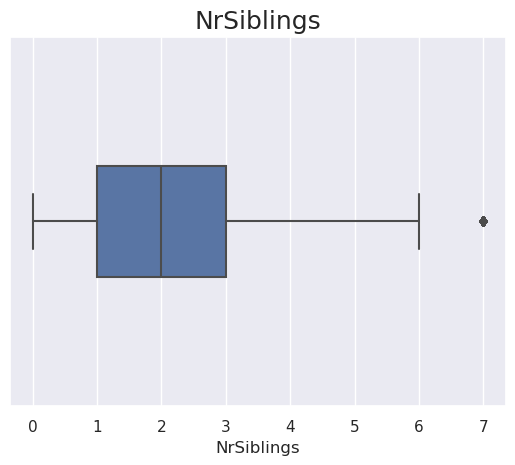

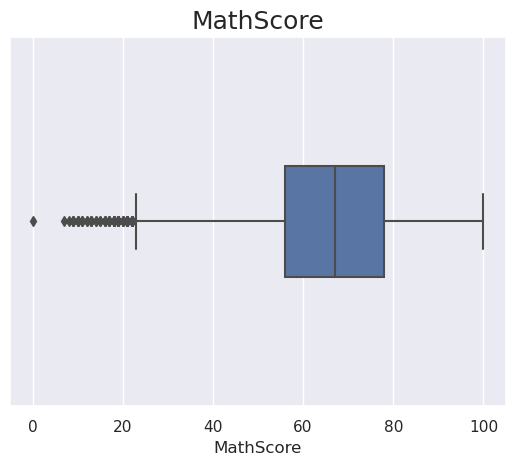

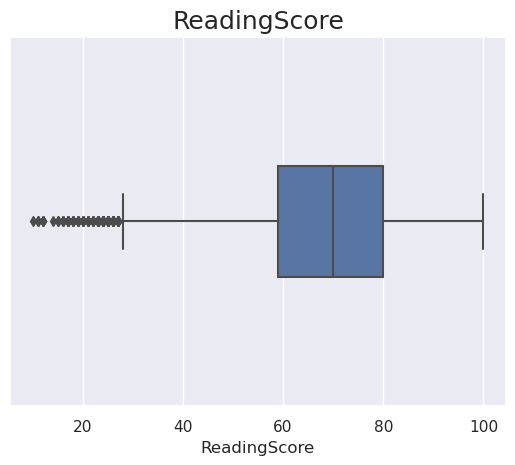

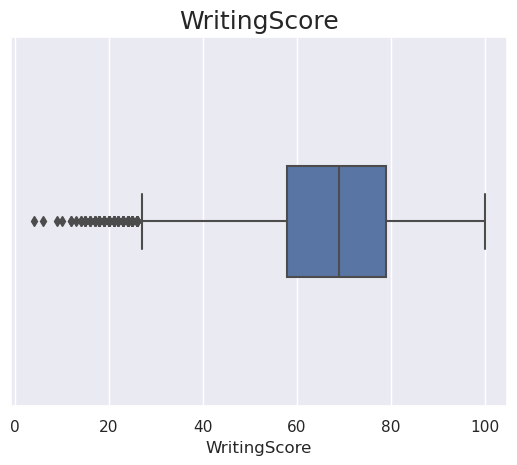

In [42]:
# create a boxplot of numeric columns in the dataset 
for i in range(len(numeric_cols)):
    boxplot(numeric_cols[i], data)

Looks like most students have between 1-3 siblings with a few outliers.
</br>
The testing scores are mostly between 60-80, also with a few outliers.
</br>

In [43]:
# histogram function with KDE overlay 
# plot mean as a red line 
def hist_plot(x, df):
    plt.hist(df[x], alpha=0.4, edgecolor="black", color='blue')
    # sns.distplot(df[x], color='blue')
    plt.title(x, fontsize=18)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    mean = df[x].mean()
    plt.axvline(mean,linewidth=4,color='black');

## this doesnt work ############
    # Add normal distribution
#     mu, sigma = mean, df[x].std()
#     x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#     y = np.exp(-(x-mu)**2/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
#     plt.plot(x, y, lw=2, color='red')
#     plt.show()

#     df = pd.DataFrame({
#     'height': np.random.normal(170, 10, 1000)
#     })

#     hist_plot('height', df)
##############################
    
    plt.show();

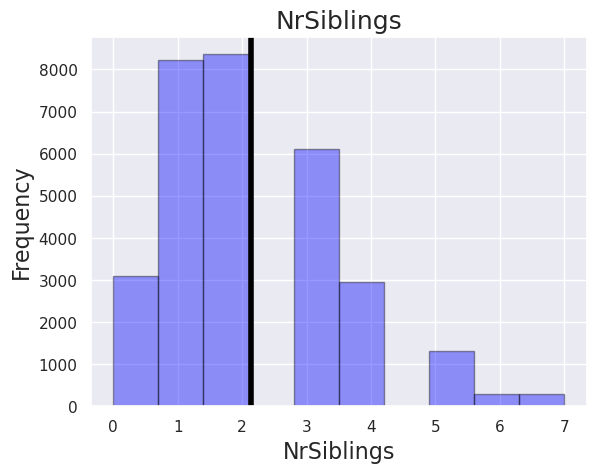

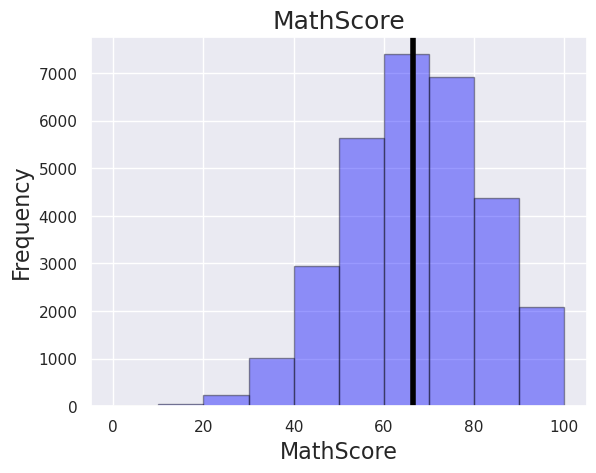

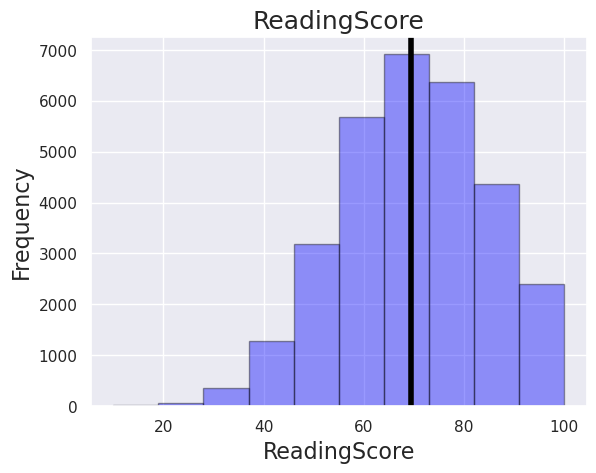

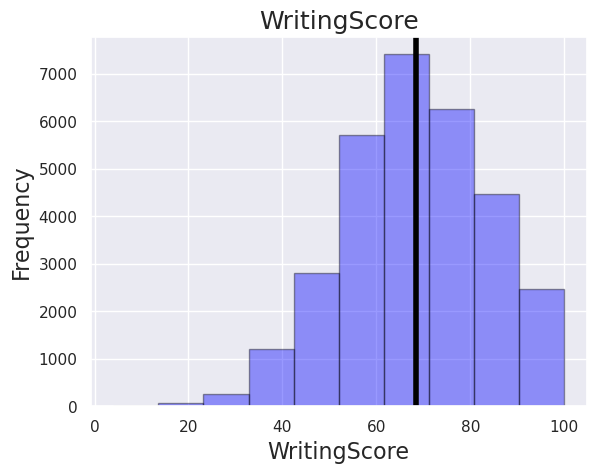

In [44]:
# call function to plot numeric data and view means
for i in range(len(numeric_cols)):
    hist_plot(numeric_cols[i], data)

The number of siblings has a positively skewed distribution. This is because most students have between 1-3 siblings, so that makes sense.
</br>
The testing scores are showing a normal distribution, which makes sense because, if the sample is laarge enough and unbiased, it should show a normal curve.
</br>

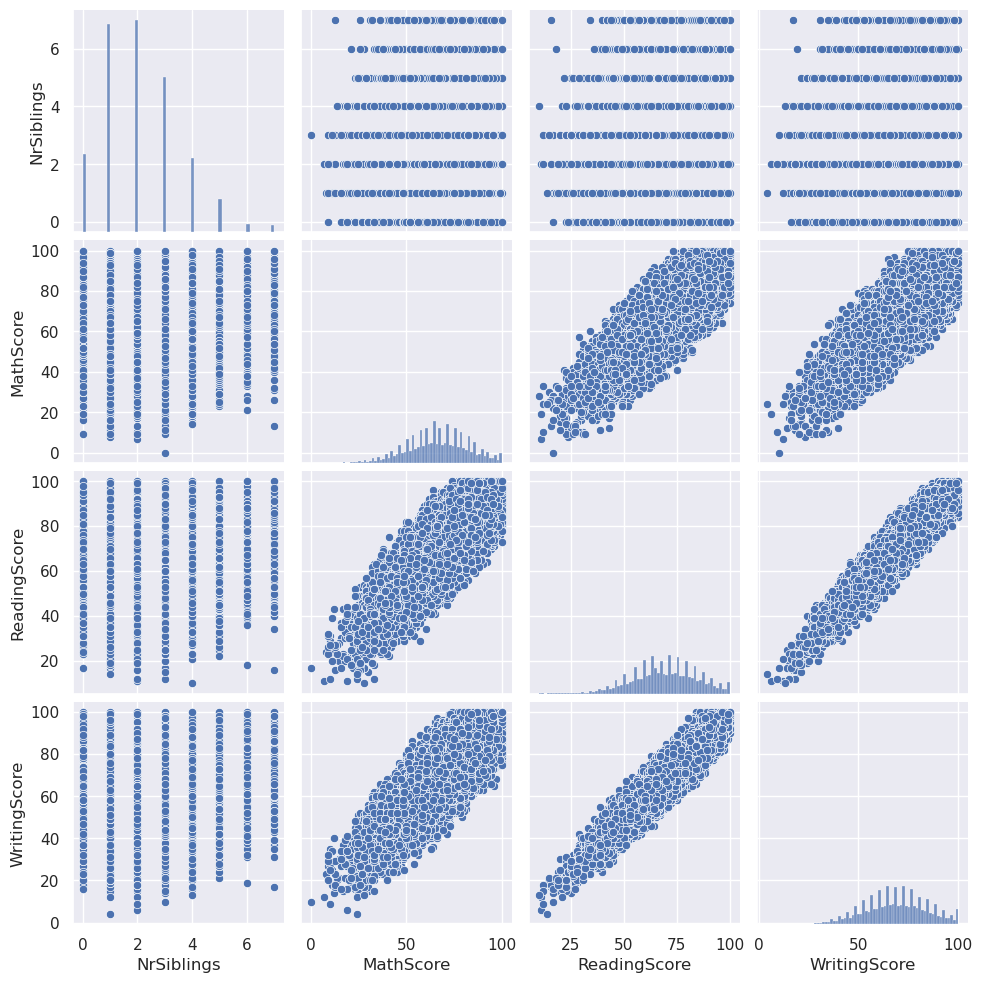

In [45]:
# create pairplots of all numeric factors in the dataset 
sns.pairplot(data)

There does appear to be a correlation between testing scores. If a student does well on one of the tests, they most likely will do well on the other tests.
</br>
I don't see much of a relationship between number of siblings and scores, but I will continue to investigate in further later to be sure.
</br>

#### Initial Thoughts:
The benefit of looking at plots like these is that it helps with an analysis of whether the probable attribute values are reasonable.
<br>
* **Number of Siblings**: I expected that the number of siblings would have a normal distribution, but it does appear to be right leaning. The boxplot shows a Q1 value of 1 with a Q3 value of 3, both are reasonable numbers with a few outliers.
<br>
* **Test Scores**: The testing score numeric features (Math, Reading, and Writing) show normally distributed histograms. I would expect the scores to show a normal distribution if the samples were generated fairly.
<br>
*  **Pairplots**: In the pairplot visualizations, it can be clearly seen that the testing scores show a positive linear relationship. 

### Exploring Categorical Features of the Data Set
Let's compare the data with some visualizations to look for patterns and see proportions

In [46]:
# barplot function  
def bar_plot(x, df):
    count = df[x].value_counts()
    sns.barplot(data=df, x=count.index, y=count.values, alpha=0.8)
    plt.title(x, fontsize=18)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Number of Occurrences', fontsize=16)
    plt.show();

In [47]:
categorical_cols = ['Gender', 'EthnicGroup', 'ParentEduc',
                   'LunchType', 'TestPrep', 
                   'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
                   'TransportMeans', 'WklyStudyHours'] 

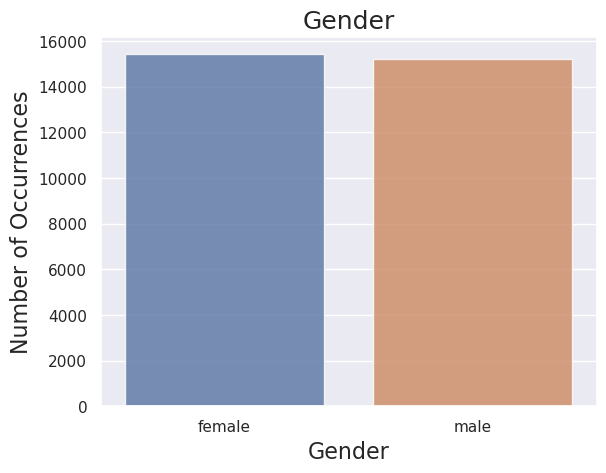

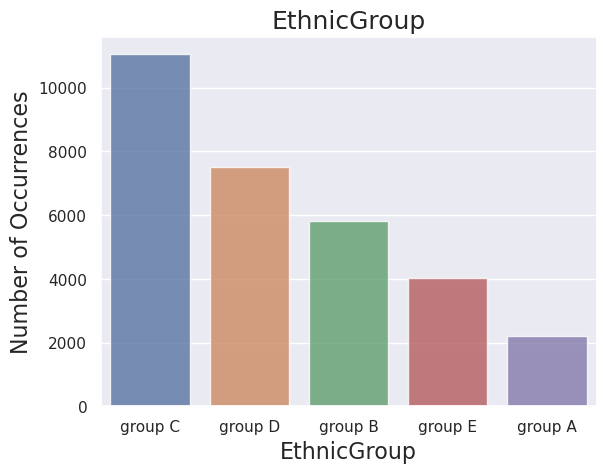

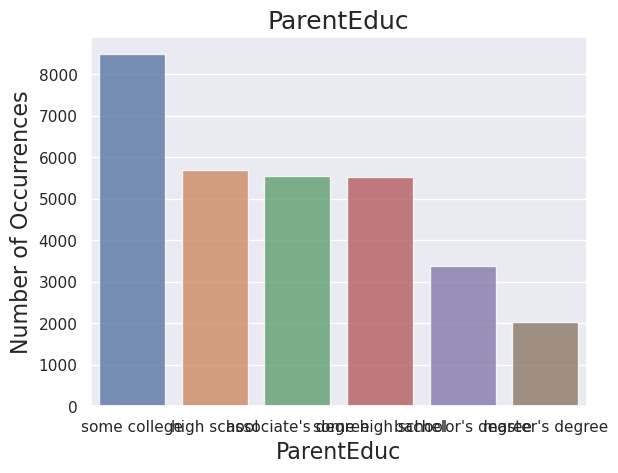

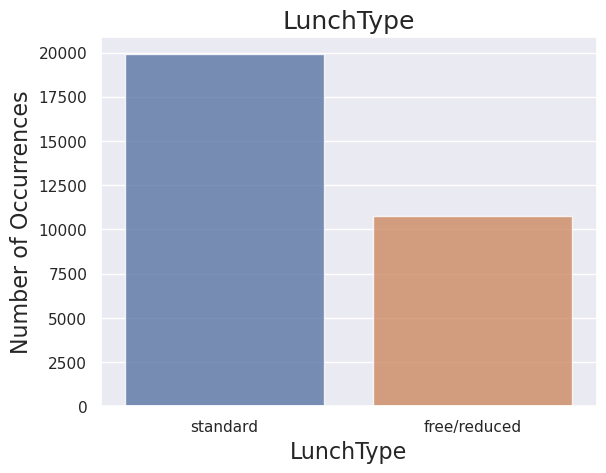

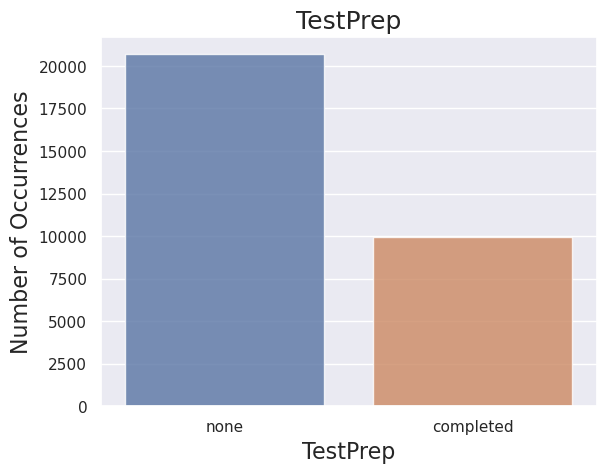

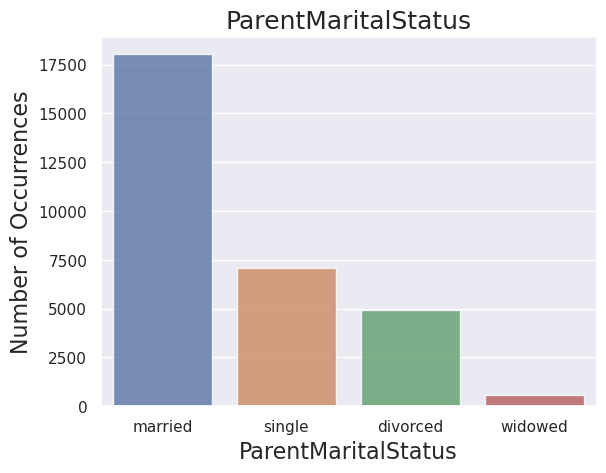

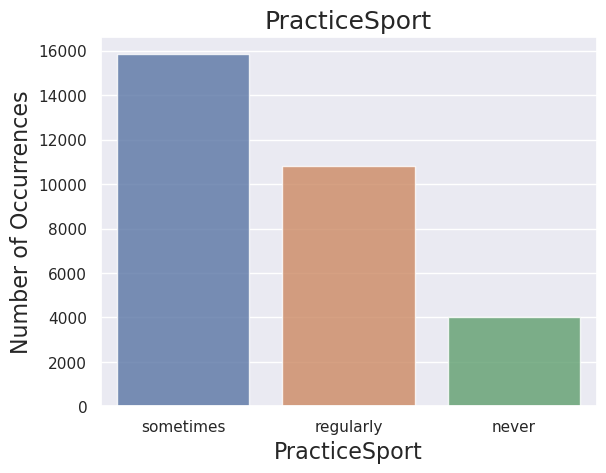

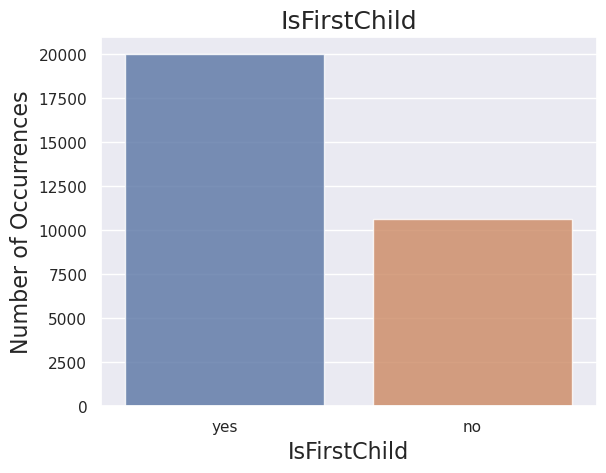

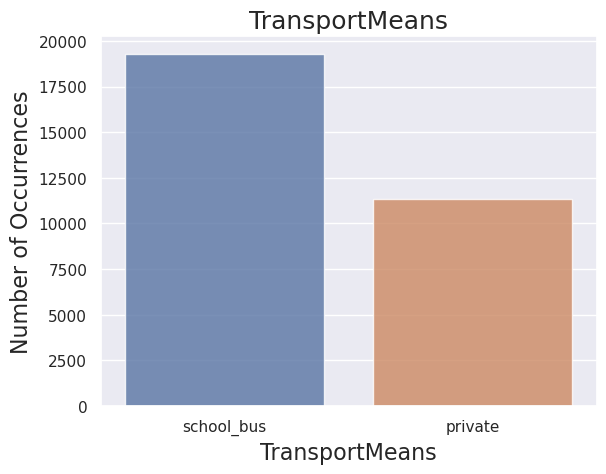

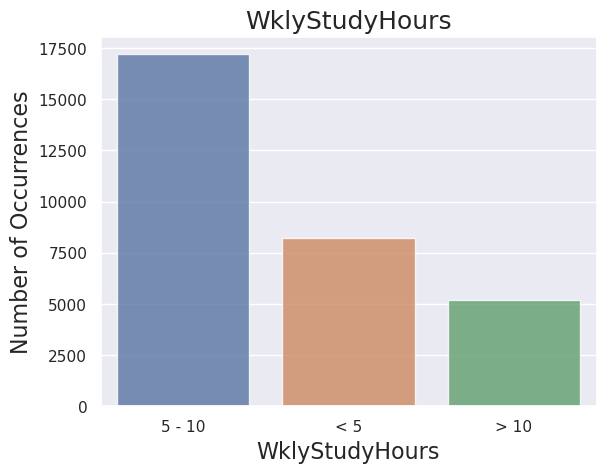

In [48]:
for i in range(len(categorical_cols)):
    bar_plot(categorical_cols[i], data)

#### Initial Thoughts:
The benefit of looking at bar graphs like these is that it helps with the initial analysis of whether the probable attribute values are reasonable and make sense in this data set.
<br>
* **Gender**: I expected that the number number of females to males to be fairly even, and it is.
<br>
* **EthnicGroup**: The distribution shows largest to smallest represented group: C, D, B, E, A. 
<br>
*  **ParentEduc**: The parent's education feature shows that most parents have some college, and few parents have master's degrees. 
<br>
*  **LunchType**: Most students in this data set recieve standard lunch, however, in every district I have worked for, this is not the case. I'm not sure what this data is based on, but it is not based around the local population where I have worked. 
<br>
*  **TestPrep**: Most students do not participate in test prep, and I am anxious to see if those who do score higher. 
<br>
*  **ParentMaritalStatus**: Most students have married parents; few have widowed. 
<br>
*  **PracticeSport**: Most students only sometimes practice for sports, and bery few never practice. 
<br>
*  **IsFirstChild**: Most of the students are the first born/oldest sibling. 
<br>
*  **TransportMeans**: Most students take public transportation to school. 
<br>
*  **WklyStudyHours**: Most students spend 5-10 hours studying, with very few studying more than 10 hours a week.
</br> 

<AxesSubplot: xlabel='WklyStudyHours', ylabel='MathScore'>

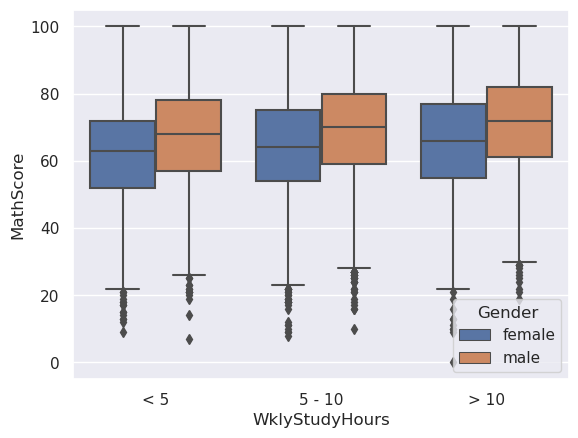

In [49]:
# make a few initial comparisons
sns.boxplot(data=data, x="WklyStudyHours", y="MathScore", hue="Gender")

<AxesSubplot: xlabel='WklyStudyHours', ylabel='ReadingScore'>

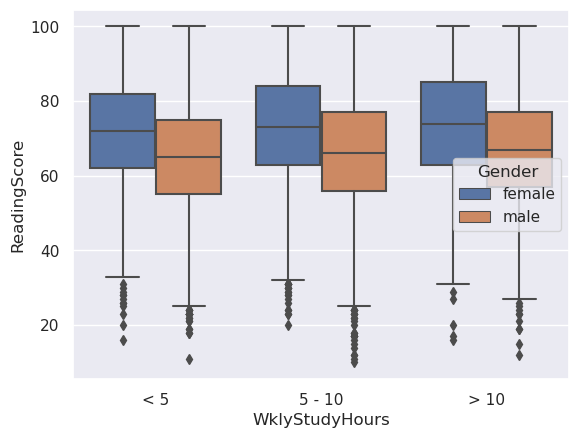

In [50]:
# make a few initial comparisons
sns.boxplot(data=data, x="WklyStudyHours", y="ReadingScore", hue="Gender")

<AxesSubplot: xlabel='WklyStudyHours', ylabel='WritingScore'>

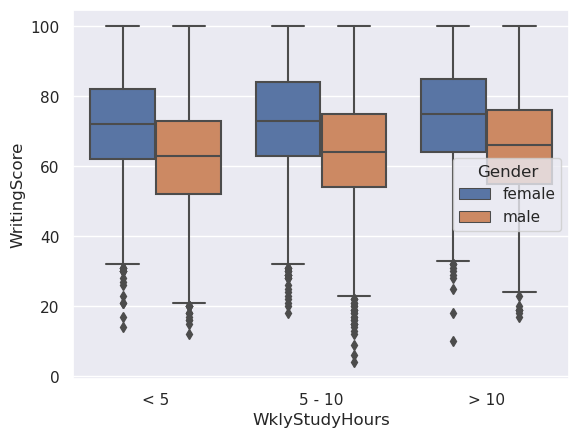

In [51]:
# make a few initial comparisons
sns.boxplot(data=data, x="WklyStudyHours", y="WritingScore", hue="Gender")

<AxesSubplot: xlabel='TestPrep', ylabel='MathScore'>

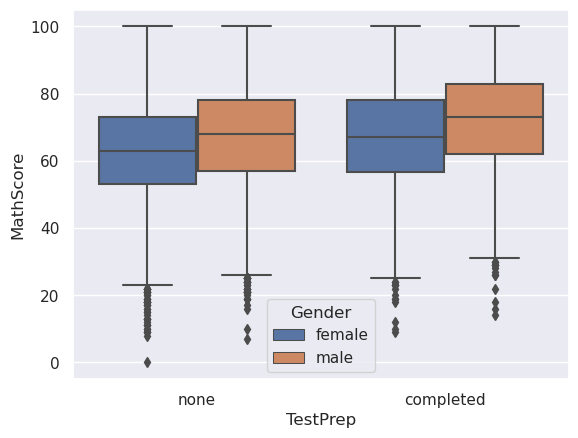

In [52]:
# make a few initial comparisons
sns.boxplot(data=data, x="TestPrep", y="MathScore", hue="Gender")

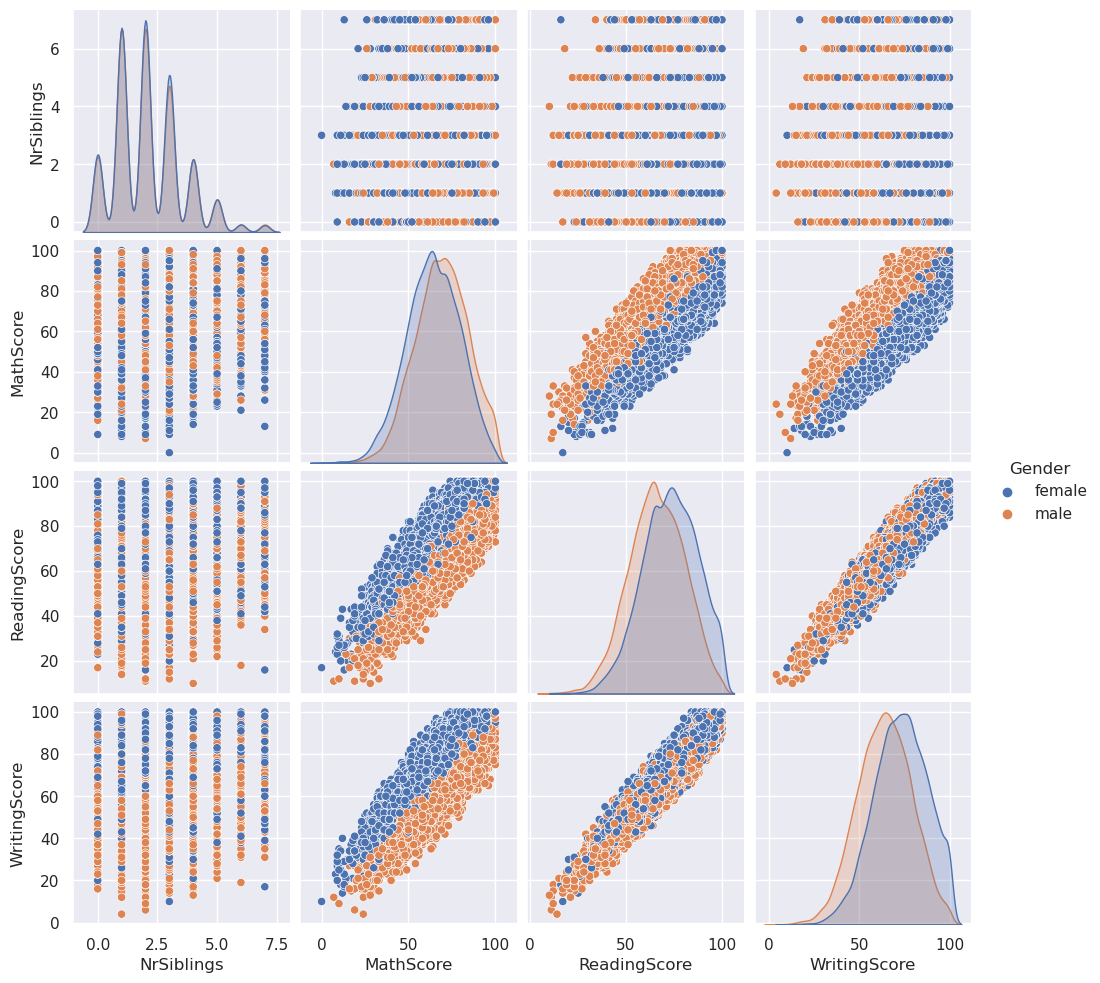

In [53]:
# create pairplots of all numeric factors in the dataset 
# hue is based on approval status 
sns.pairplot(data, hue="Gender")

#### Initial Comparision Thoughts:
Males tend to have a higher math score, while females are generally higher in reading and writing.
<br>
I also notice that more males completed a test prep activity and spend more time studying for math exams, while females study longer for reading and writing.
<br>


#### Next Steps:
1. Convert categorical data into numeric variables to make it easier for calculations and visualizations.
<br>
2. Search for outliers and remove or replace them.
<br>
3. Study correlations.
</br>

## Data Transformation, Cleaning, Chi Values, Scaling

### Convert the output variables to binary.
I will use 0 for did not pass and 1 for passed, and I will set the passing score as 75 or better. I chose 75% as a threshold because most classes require a C or better for a course to be used as a prerequisite.

In [54]:
# this function binarizes a score, returning 1 if the score is 75 or higher and 0 otherwise.
def binarize_score(score):
  if score >= 75:
    return 1
  else:
    return 0

# apply the binarize_score function to the MathScore, ReadingScore, and WritingScore columns
data["MathScore"] = data["MathScore"].apply(binarize_score)
data["ReadingScore"] = data["ReadingScore"].apply(binarize_score)
data["WritingScore"] = data["WritingScore"].apply(binarize_score)

# check the results
data[["MathScore", "ReadingScore", "WritingScore"]].head()
#data.head(20)
#data.info()
#data["WklyStudyHours"].value_counts()

MathScore  ReadingScore  WritingScore
0          0             0             0
1          0             1             1
2          1             1             1
3          0             0             0
4          1             1             1

### Change categorical variables to numbers to be used for computations.

In [55]:
# this function converts WklyStudyHours from <5, 5-10, >10 into integers 1, 2, and 3.
def categorize_wkly_study_hours(wkly_study_hours):
  if wkly_study_hours == "< 5":
    return 1
  elif wkly_study_hours == "5 - 10":
    return 2
  else:
    return 3

# apply the function
data["WklyStudyHours"] = data["WklyStudyHours"].apply(categorize_wkly_study_hours)

# check th results
data["WklyStudyHours"].head()

0    1
1    2
2    1
3    2
4    2
Name: WklyStudyHours, dtype: int64

In [56]:
# convert categorical variables to numbers 
# instantiate sklearn LabelEncoder
le = preprocessing.LabelEncoder()

# iterate over all the values of each column and extract their dtypes
for col in data:
    # Compare if the dtype is object
    if data[col].dtypes == 'object':
    # Use LabelEncoder to do the numeric transformation
        le.fit(data[col])
        data[col]=le.transform(data[col])
# check results        
data.head()
# check types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  int64  
 1   EthnicGroup          30641 non-null  int64  
 2   ParentEduc           30641 non-null  int64  
 3   LunchType            30641 non-null  int64  
 4   TestPrep             30641 non-null  int64  
 5   ParentMaritalStatus  30641 non-null  int64  
 6   PracticeSport        30641 non-null  int64  
 7   IsFirstChild         30641 non-null  int64  
 8   NrSiblings           30641 non-null  float64
 9   TransportMeans       30641 non-null  int64  
 10  WklyStudyHours       30641 non-null  int64  
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.3 MB


In [57]:
# convert number of siblings from float to integer
# I'm not sure why siblings were entered as a float in the first place... who has .something of a sibling?

# this function takes in a float and returns an int
def convert_float_to_int(nr_siblings):
    return int(nr_siblings)

# apply the function
data["NrSiblings"] = data["NrSiblings"].apply(convert_float_to_int)

# check the results
data["NrSiblings"].head()

0    3
1    0
2    4
3    1
4    0
Name: NrSiblings, dtype: int64

In [58]:
# create filtered version of DataFrame 
# only has categorical columns 
categorical_df = data[categorical_cols]
categorical_df.head()

Gender  EthnicGroup  ParentEduc  LunchType  TestPrep  ParentMaritalStatus  \
0       0            2           1          1         1                    1   
1       0            2           4          1         1                    1   
2       0            1           3          1         1                    2   
3       1            0           0          0         1                    1   
4       1            2           4          1         1                    1   

   PracticeSport  IsFirstChild  TransportMeans  WklyStudyHours  
0              1             1               1               1  
1              2             1               1               2  
2              2             1               1               1  
3              0             0               1               2  
4              2             1               1               2

In [59]:
# check data types 
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               30641 non-null  int64
 1   EthnicGroup          30641 non-null  int64
 2   ParentEduc           30641 non-null  int64
 3   LunchType            30641 non-null  int64
 4   TestPrep             30641 non-null  int64
 5   ParentMaritalStatus  30641 non-null  int64
 6   PracticeSport        30641 non-null  int64
 7   IsFirstChild         30641 non-null  int64
 8   TransportMeans       30641 non-null  int64
 9   WklyStudyHours       30641 non-null  int64
dtypes: int64(10)
memory usage: 2.3 MB


In [60]:
# make sure it has no null values 
categorical_df.isnull().sum()
data.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

### Plotting Converted Data
Now that the data in converted into integers, I can use histograms to see if I notice any new patterns.

#### Math scores

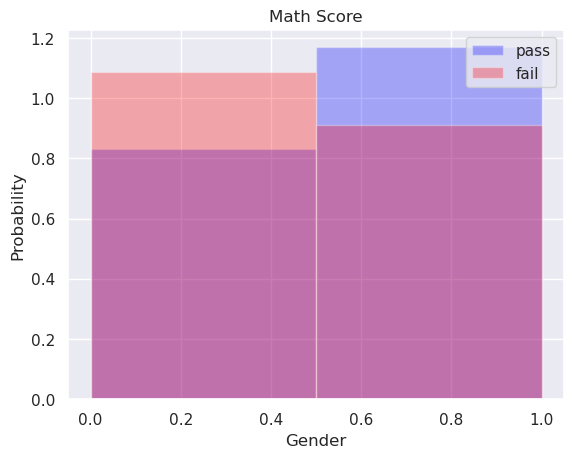

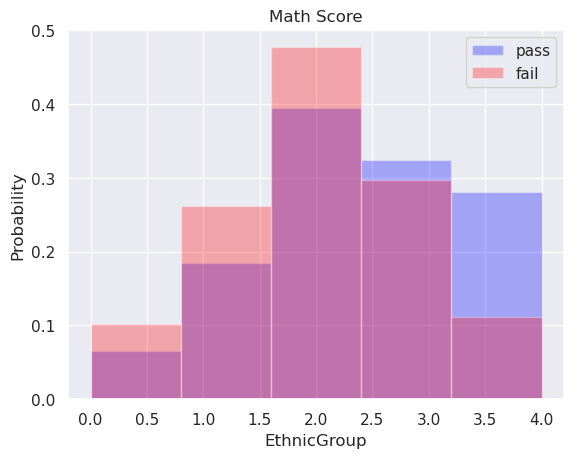

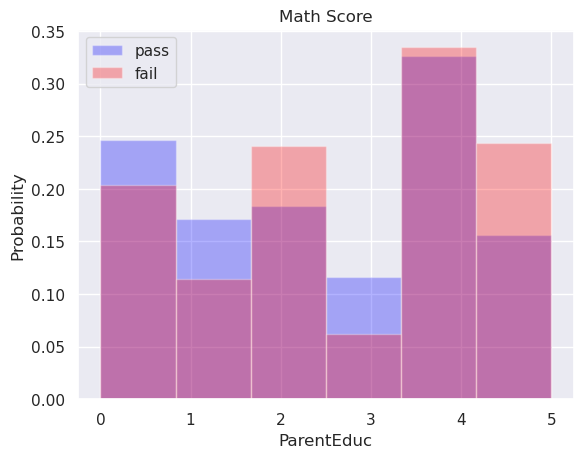

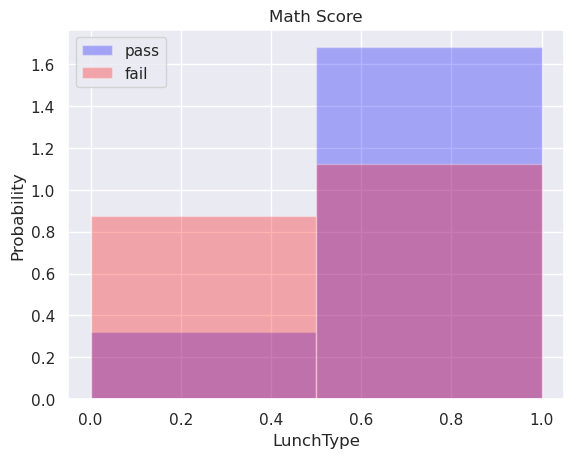

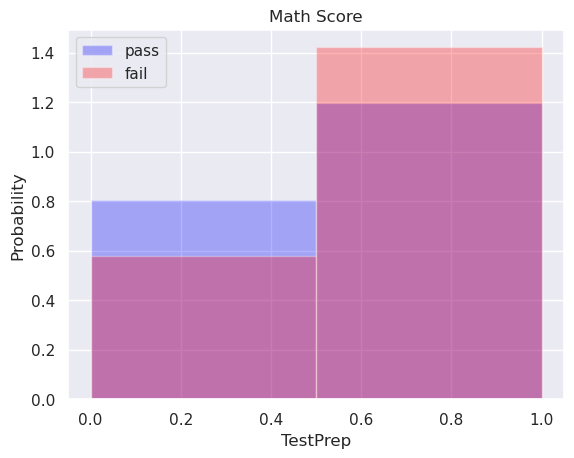

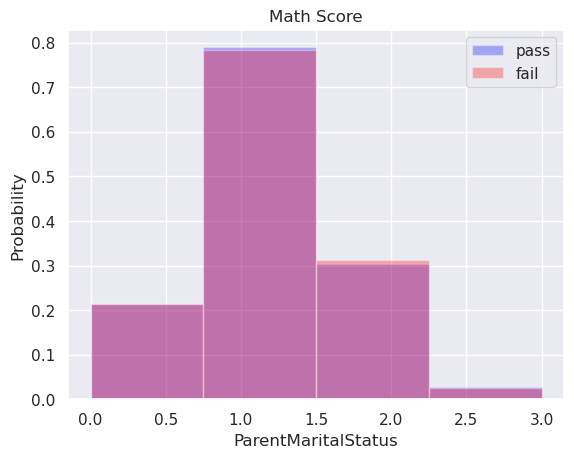

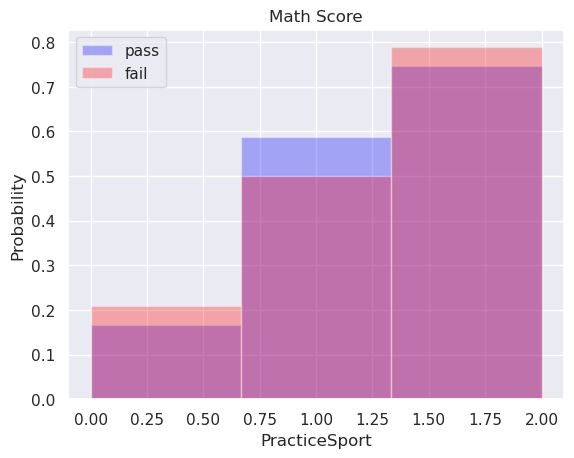

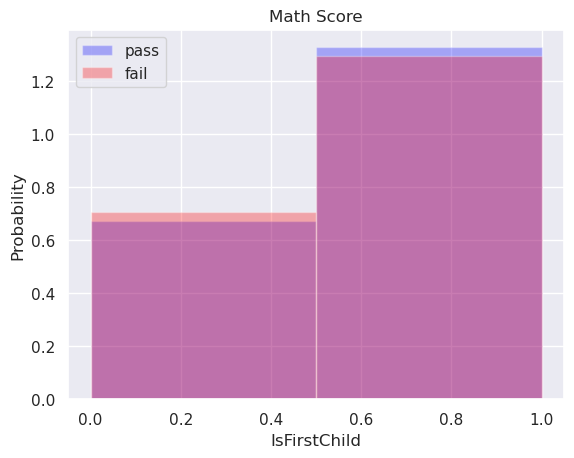

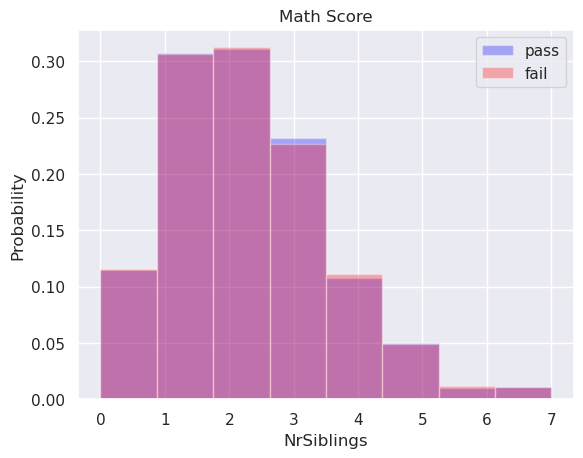

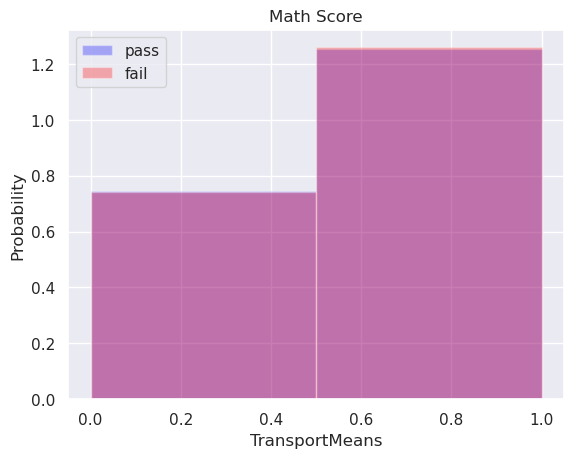

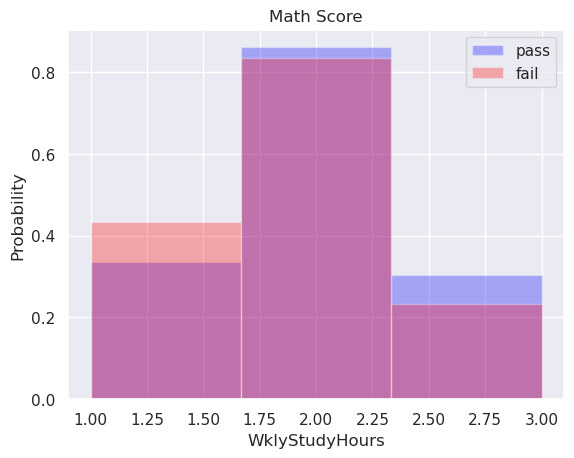

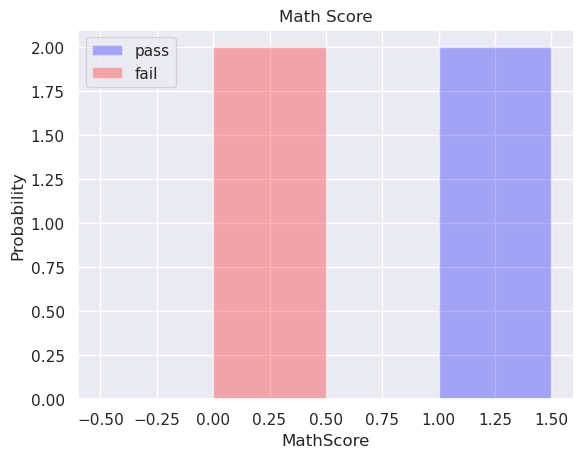

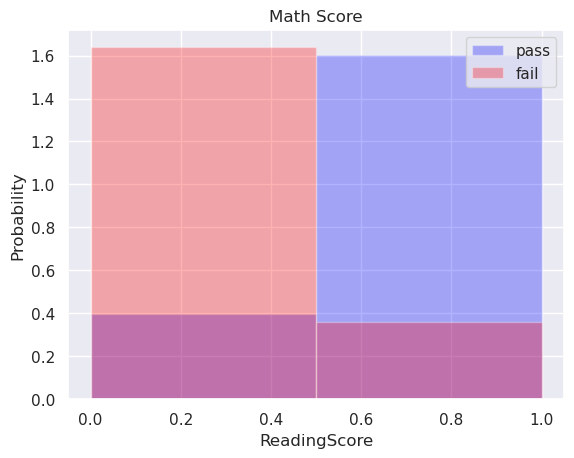

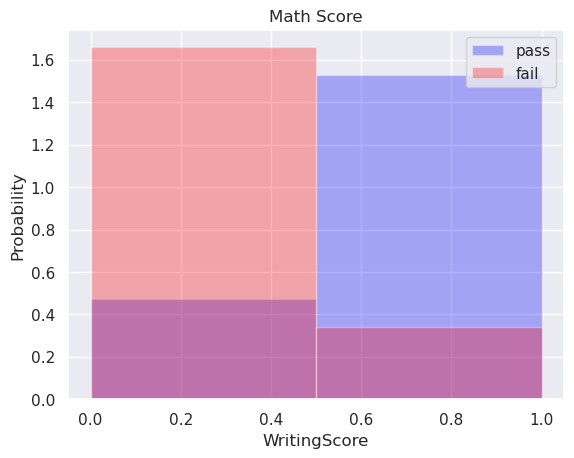

In [61]:
# histogram of math pass or fail scores
for label in data.columns:
  plt.hist(data[data["MathScore"] ==1][label], color='blue', label='pass', alpha=0.3, density=True, bins=int(max(data[label]) - min(data[label]) + 1))
  plt.hist(data[data["MathScore"] ==0][label], color='red', label='fail', alpha=0.3, density=True, bins=int(max(data[label]) - min(data[label]) + 1))
  plt.title("Math Score")
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#### Reading Scores

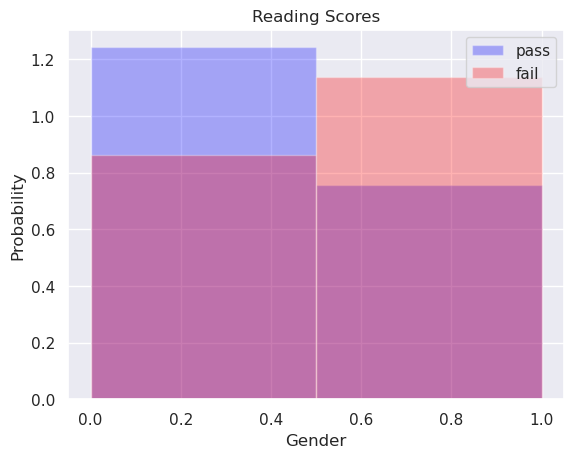

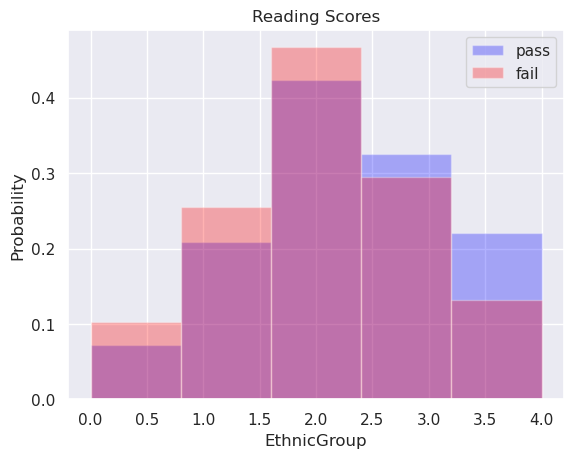

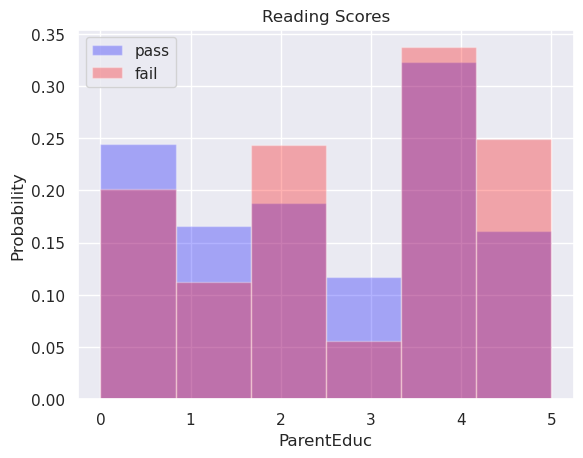

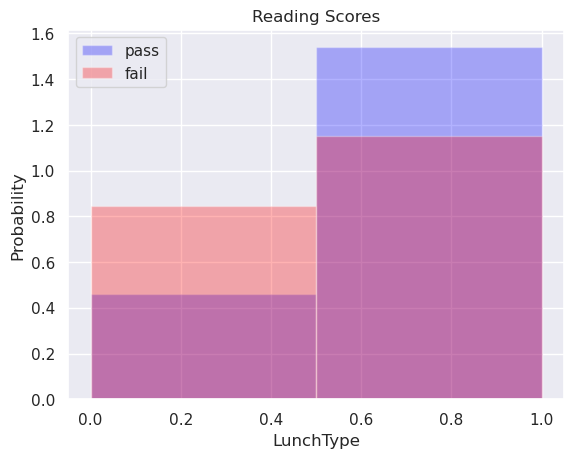

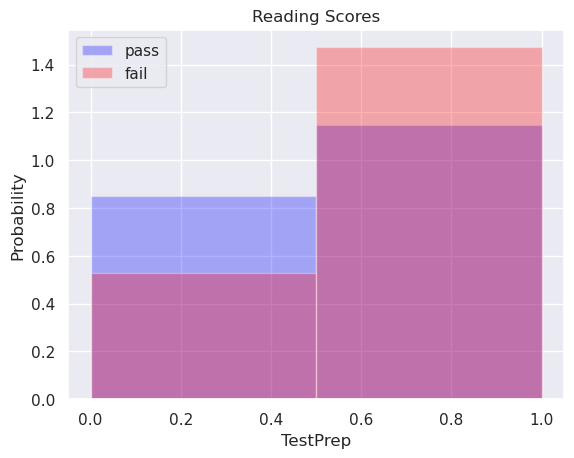

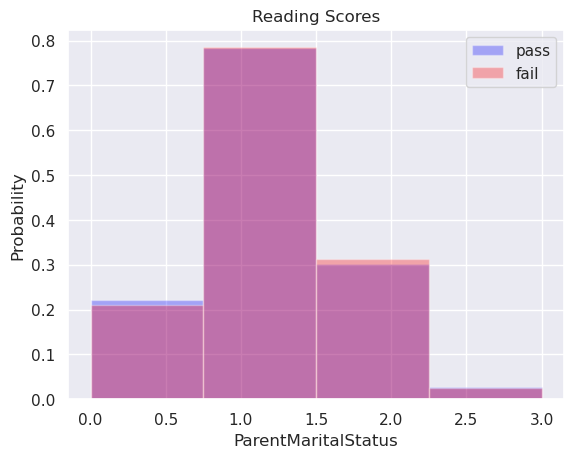

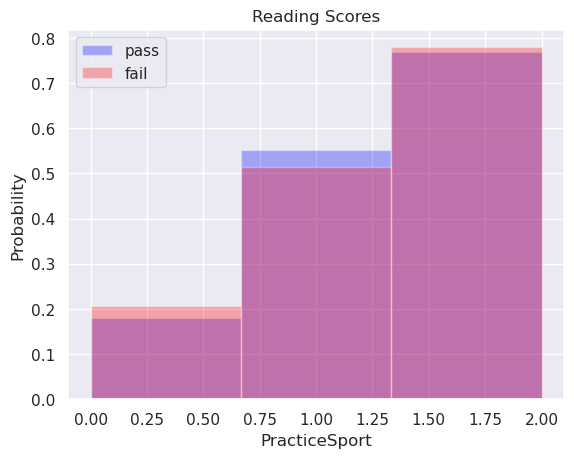

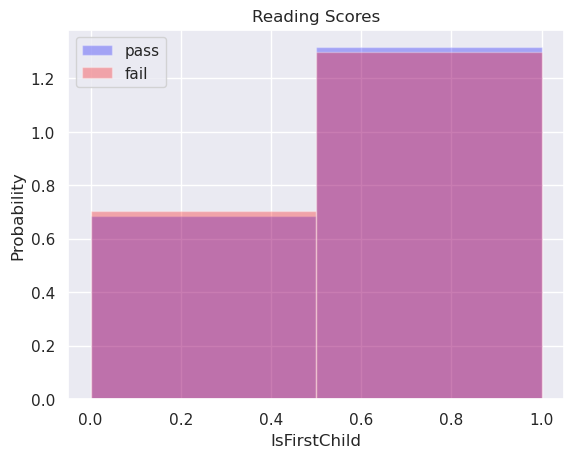

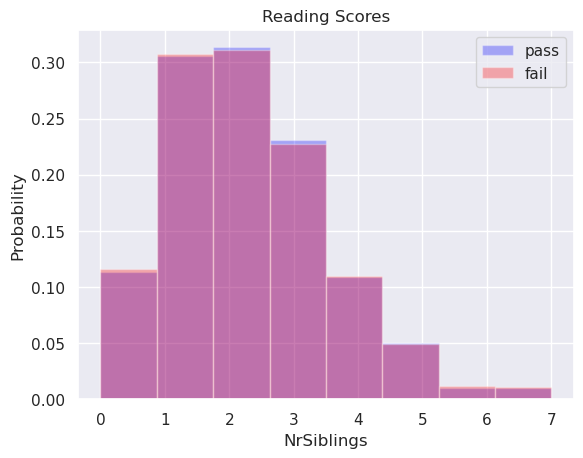

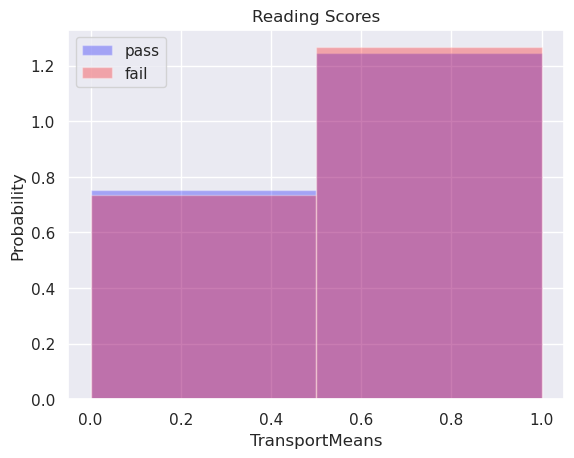

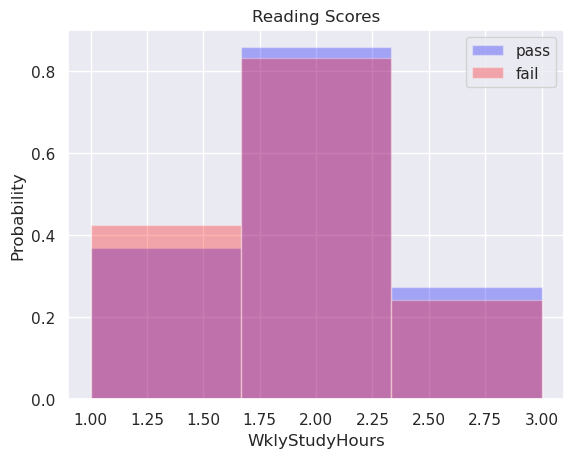

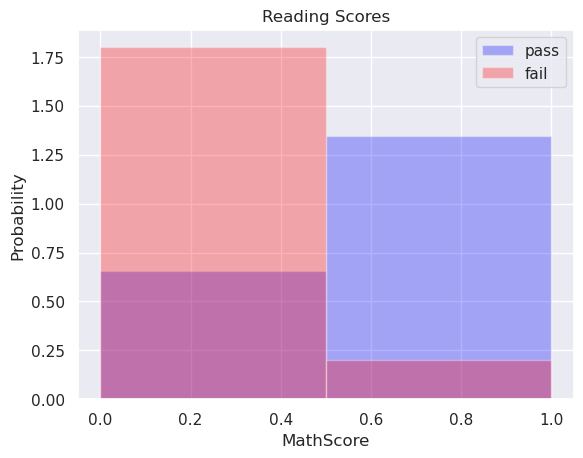

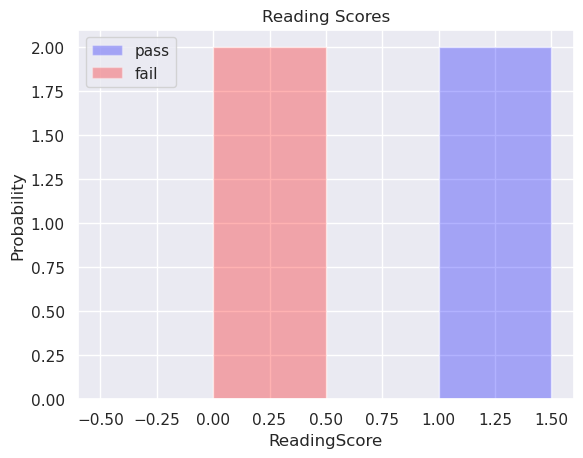

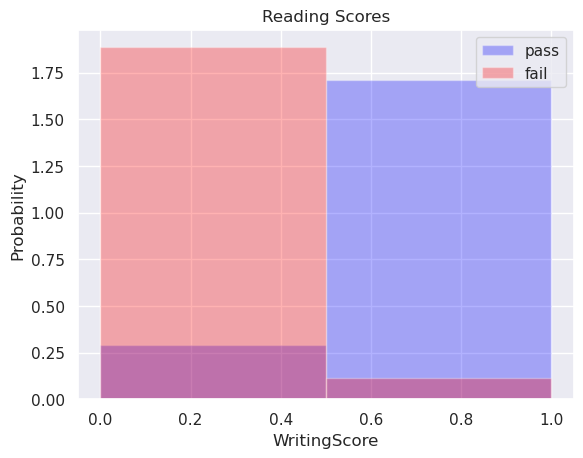

In [62]:
# histogram of math pass or fail scores
for label in data.columns:
  plt.hist(data[data["ReadingScore"] ==1][label], color='blue', label='pass', alpha=0.3, density=True, bins=int(max(data[label]) - min(data[label]) + 1))
  plt.hist(data[data["ReadingScore"] ==0][label], color='red', label='fail', alpha=0.3, density=True, bins=int(max(data[label]) - min(data[label]) + 1))
  plt.title("Reading Scores")
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#### Writing Scores

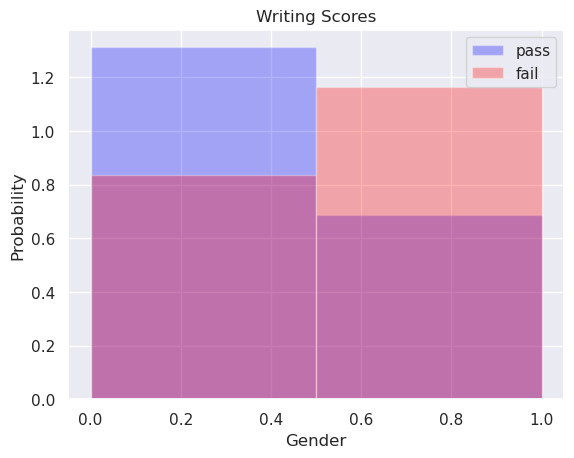

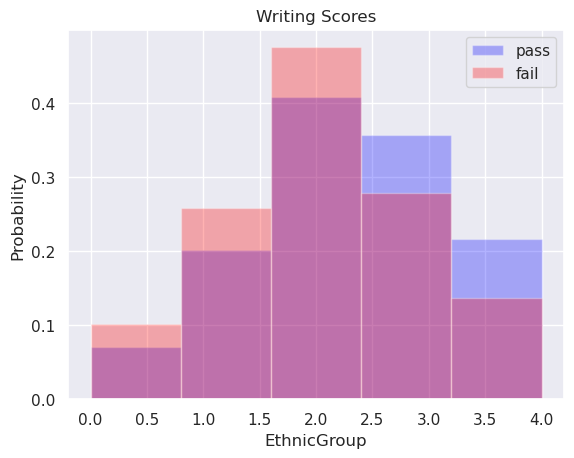

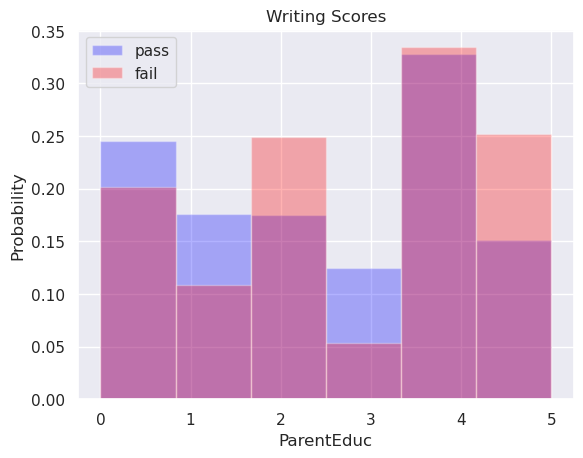

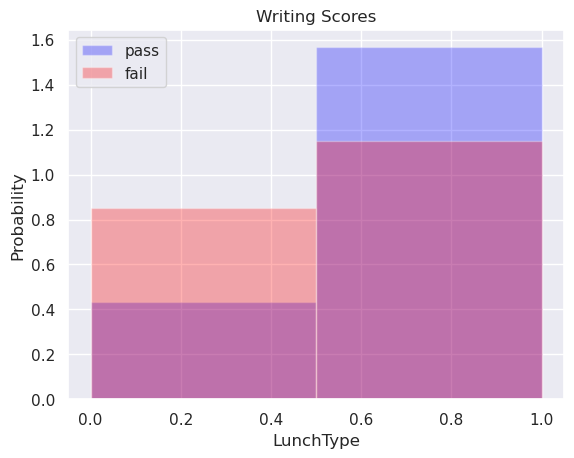

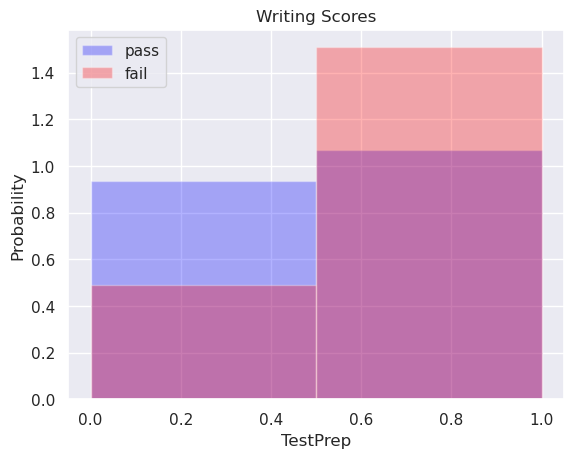

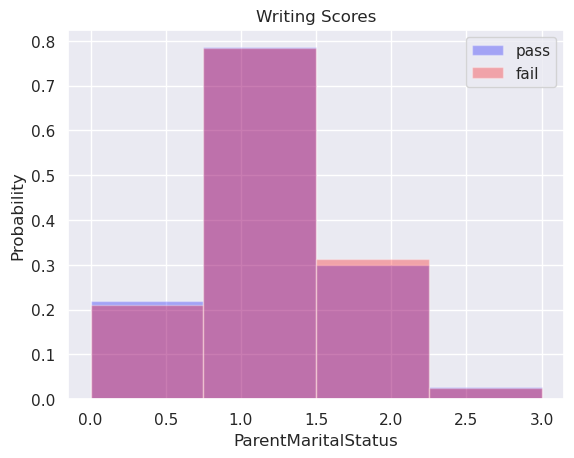

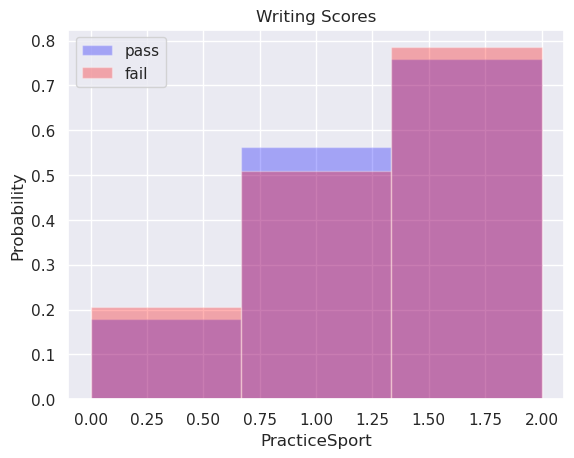

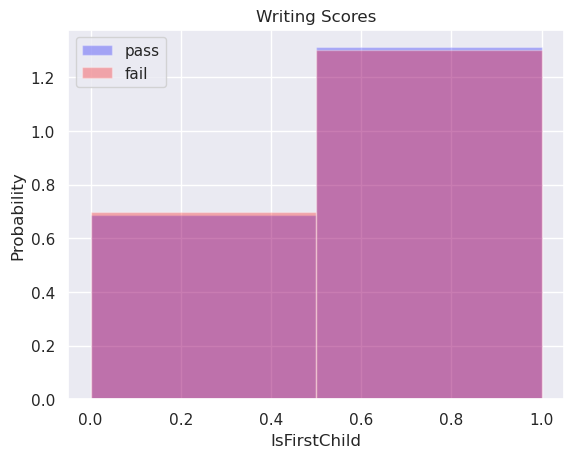

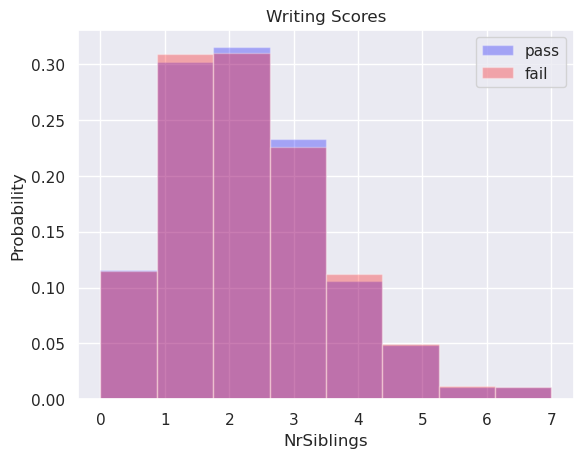

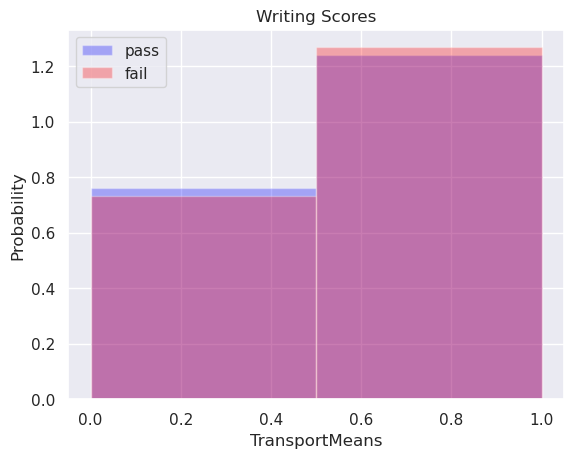

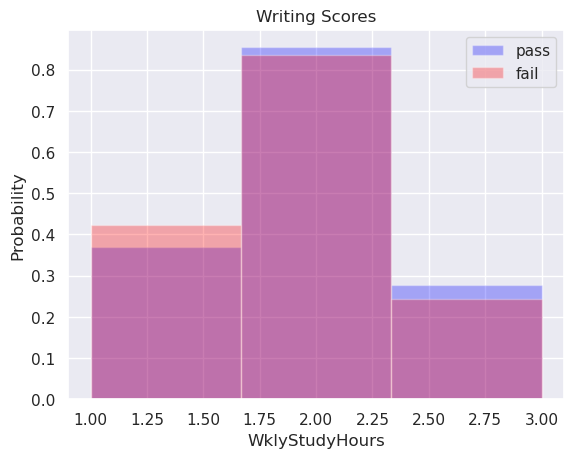

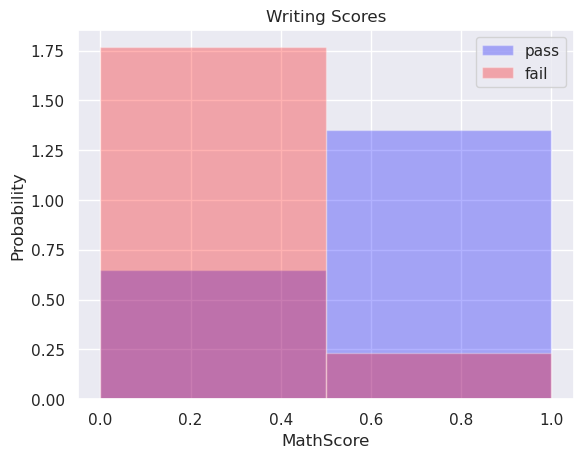

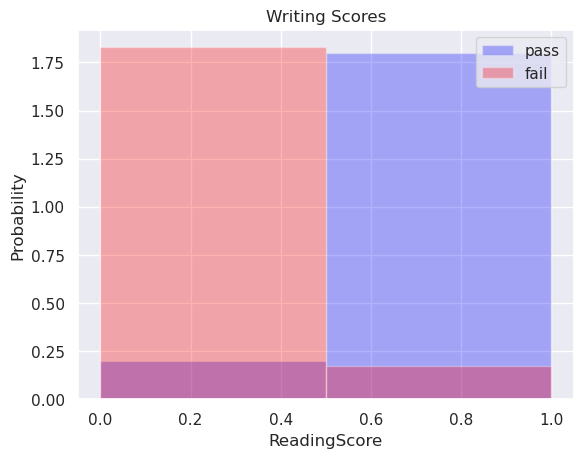

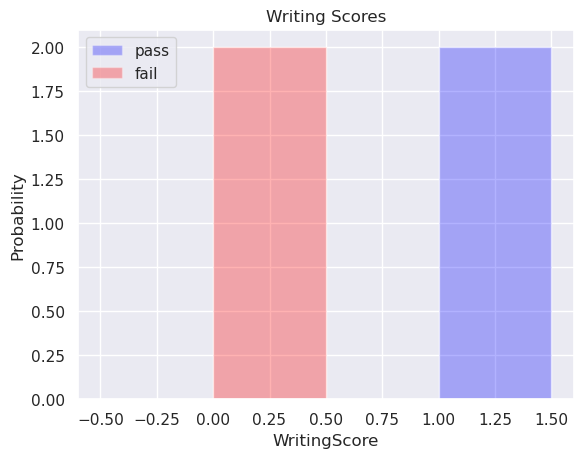

In [63]:
# histogram of writin pass or fail scores
for label in data.columns:
  plt.hist(data[data["WritingScore"] ==1][label], color='blue', label='pass', alpha=0.3, density=True, bins=int(max(data[label]) - min(data[label]) + 1))
  plt.hist(data[data["WritingScore"] ==0][label], color='red', label='fail', alpha=0.3, density=True, bins=int(max(data[label]) - min(data[label]) + 1))
  plt.title("Writing Scores")
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

### Assess Chi Values for Correlations

In [64]:
# compare each of the categorical predictors with test score

# create input and output for math
X_math = data.drop('MathScore',axis=1)
y_math = data['MathScore']

# create input and output for reading
X_reading = data.drop('ReadingScore', axis=1)
y_reading = data['ReadingScore']

# create input and output for writing
X_writing = data.drop('WritingScore', axis=1)
y_writing = data['WritingScore']


In [65]:
# Compute chi-squared stats between each feature and math score.
chi_scores_math, p_values_math = chi2(X_math,y_math)
print("math chi scores: ", chi_scores_math)
print("math p values: :", p_values_math)
print(len(chi_scores_math))

# Create feature list for math
categorical_list_math = list(data.drop('MathScore',axis=1))
print("categorical_list_math: ", categorical_list_math)

math chi scores:  [2.20678454e+02 5.24734933e+02 2.32213320e+02 7.95751822e+02
 1.24441206e+02 1.68279752e-02 2.05808339e-02 2.96993101e+00
 4.72538144e-02 6.13432622e-02 4.42463325e+01 6.78998170e+03
 6.50110525e+03]
math p values: : [6.43274815e-050 3.94823964e-116 1.96184304e-052 4.52579234e-175
 6.74482832e-029 8.96785834e-001 8.85926728e-001 8.48254720e-002
 8.27912664e-001 8.04385319e-001 2.89546347e-011 0.00000000e+000
 0.00000000e+000]
13
categorical_list_math:  ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'ReadingScore', 'WritingScore']


In [66]:
# Compute chi-squared stats between each feature and reading score.
chi_scores_reading, p_values_reading = chi2(X_reading,y_reading)
print("reading chi scores: ", chi_scores_reading)
print("reading p values: ", p_values_reading)
print(len(chi_scores_reading))

# Create feature list for reading
categorical_list_reading = list(data.drop('ReadingScore',axis=1))
print("categorical_list_reading: ", categorical_list_reading)

reading chi scores:  [5.21861237e+02 2.08011115e+02 2.57483022e+02 4.13185137e+02
 2.81461467e+02 1.22325135e+00 6.30412394e-01 1.00016965e+00
 8.94760145e-04 1.16651572e+00 1.28039223e+01 7.45442406e+03
 1.27707850e+04]
reading p values:  [1.66573707e-115 3.73072876e-047 6.06970200e-058 7.42694742e-092
 3.60678358e-063 2.68723516e-001 4.27204086e-001 3.17269461e-001
 9.76136804e-001 2.80118324e-001 3.45893412e-004 0.00000000e+000
 0.00000000e+000]
13
categorical_list_reading:  ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'WritingScore']


In [67]:
# Compute chi-squared stats between each feature and writing score.
chi_scores_writing, p_values_writing = chi2(X_writing,y_writing)
print("writing chi scores: ", chi_scores_writing)
print("writing p values: ", p_values_writing)
print(len(chi_scores_writing))

# Create feature list for writing
categorical_list_writing = list(data.drop('WritingScore',axis=1))
print("categorical_list_writing: ", categorical_list_writing)

writing chi scores:  [8.02644996e+02 2.65288090e+02 2.89743250e+02 4.70628384e+02
 5.10080838e+02 1.27526297e+00 1.28010947e-03 3.36647188e-01
 1.12782200e-01 2.14901054e+00 1.25474147e+01 6.92213047e+03
 1.23858178e+04]
writing p values:  [1.43546511e-176 1.20748720e-059 5.65587544e-065 2.33898743e-104
 6.09013051e-113 2.58781668e-001 9.71458883e-001 5.61770952e-001
 7.36998605e-001 1.42661804e-001 3.96754848e-004 0.00000000e+000
 0.00000000e+000]
13
categorical_list_writing:  ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore']


In [68]:
categorical_dict = {}
c = 0 
for i in categorical_list_math: 
    categorical_dict[i] = chi_scores_math[c]
    c += 1 
    
print("Mapped math chi scores:")
print(categorical_dict)

Mapped math chi scores:
{'Gender': 220.67845371655747, 'EthnicGroup': 524.7349325268601, 'ParentEduc': 232.21331986370674, 'LunchType': 795.7518216601844, 'TestPrep': 124.44120617106589, 'ParentMaritalStatus': 0.016827975152023868, 'PracticeSport': 0.020580833851663167, 'IsFirstChild': 2.969931006798709, 'NrSiblings': 0.04725381441826321, 'TransportMeans': 0.06134326220656795, 'WklyStudyHours': 44.24633251909583, 'ReadingScore': 6789.981695503304, 'WritingScore': 6501.105249160126}


In [69]:
categorical_dict = {}
c = 0 
for i in categorical_list_math: 
    categorical_dict[i] = chi_scores_reading[c]
    c += 1 
print("Mapped reading chi scores:")
print(categorical_dict)

Mapped reading chi scores:
{'Gender': 521.8612372880012, 'EthnicGroup': 208.0111153674119, 'ParentEduc': 257.48302178785445, 'LunchType': 413.1851372790053, 'TestPrep': 281.46146692555527, 'ParentMaritalStatus': 1.2232513467590285, 'PracticeSport': 0.6304123935786806, 'IsFirstChild': 1.000169648133061, 'NrSiblings': 0.0008947601449622302, 'TransportMeans': 1.166515724234369, 'WklyStudyHours': 12.803922280445434, 'ReadingScore': 7454.424057550825, 'WritingScore': 12770.78498861498}


In [70]:
categorical_dict = {}
c = 0 
for i in categorical_list_math: 
    categorical_dict[i] = chi_scores_writing[c]
    c += 1 
print("Mapped writing chi scores:")
print(categorical_dict)

Mapped writing chi scores:
{'Gender': 802.6449956263853, 'EthnicGroup': 265.28808966784356, 'ParentEduc': 289.7432502909585, 'LunchType': 470.62838432319484, 'TestPrep': 510.080838155365, 'ParentMaritalStatus': 1.2752629664061066, 'PracticeSport': 0.0012801094739053206, 'IsFirstChild': 0.3366471878344842, 'NrSiblings': 0.11278219981943566, 'TransportMeans': 2.1490105354885745, 'WklyStudyHours': 12.547414650024399, 'ReadingScore': 6922.130467105935, 'WritingScore': 12385.817751005754}


#### Chi Score Analysis
The null hypothesis for chi2 test is that "two categorical variables are independent". A high chi-squared score indicates that the observed distribution is significantly different from the expected distribution. The features with the highest chi-squared scores for all three tests are for reading are Gender, EthnicGroup, ParentEduc, LunchType, and TestPrep.

### Searching for Outliers

I am planning to use a KNN method for predicting. The numeric values of my features have a range of values. With the raw values, there were attributes like NrSiblings that ranged from 0 to 7 and others like Gender and IsFirstChild that simply ranged from 0 to 1 (for no or yes). Many of the categorical attributes are set with this type of binary value, but there are attributes like EthinicGroup and ParentEduc that have a greater number of values. sklearn.preprocessing has an option to scale all attributes to a 0-1 range.

Text(0.5, 1.0, 'Data Attribute Ranges')

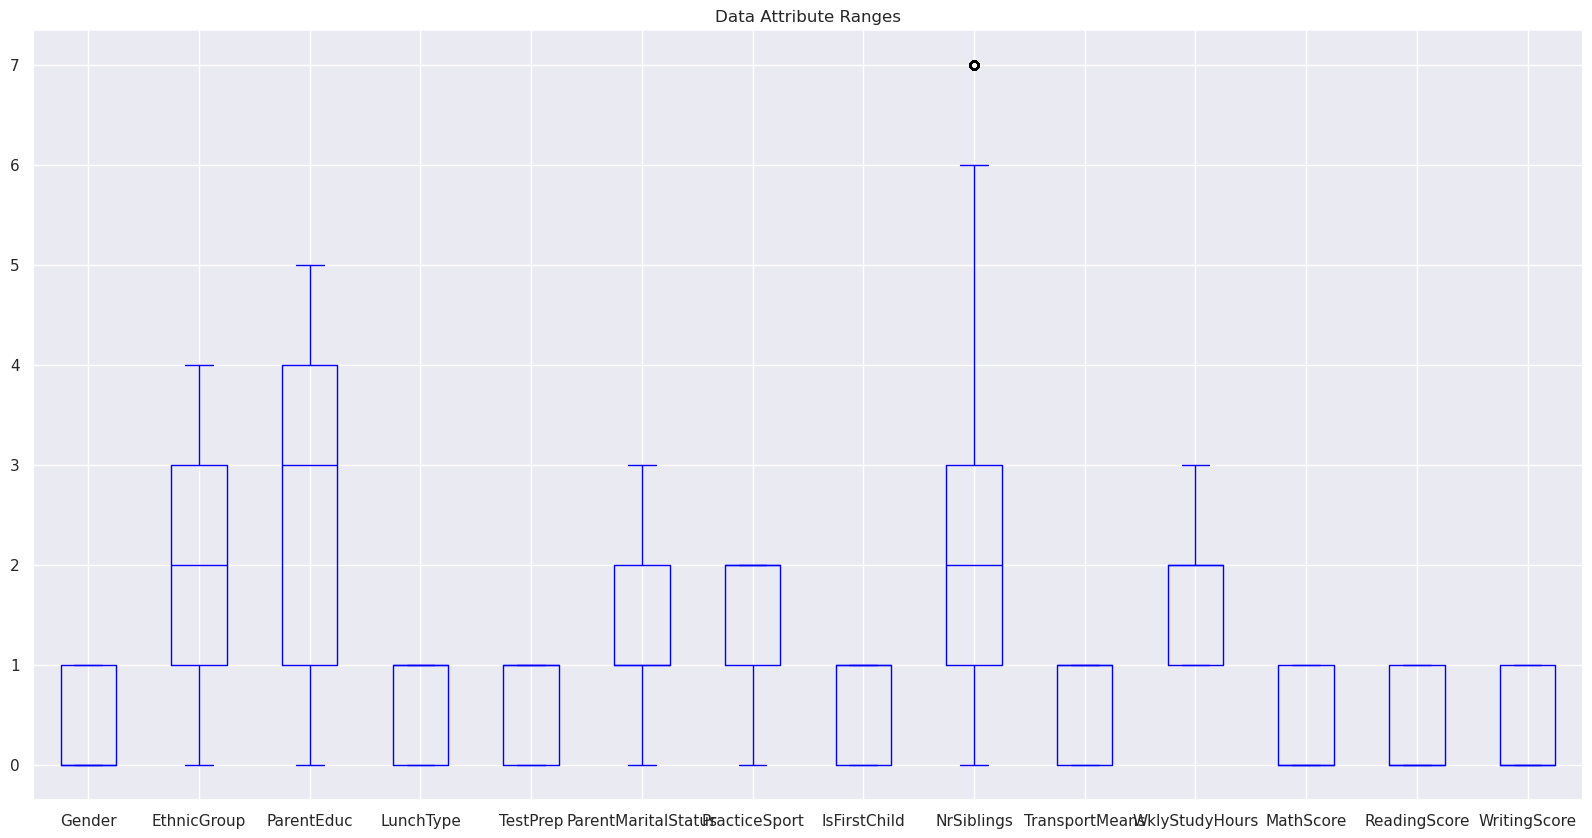

In [71]:
# boxplot for each attribute showing ranges in values 
data.plot.box(figsize=(20,10), color='blue')
plt.title('Data Attribute Ranges')

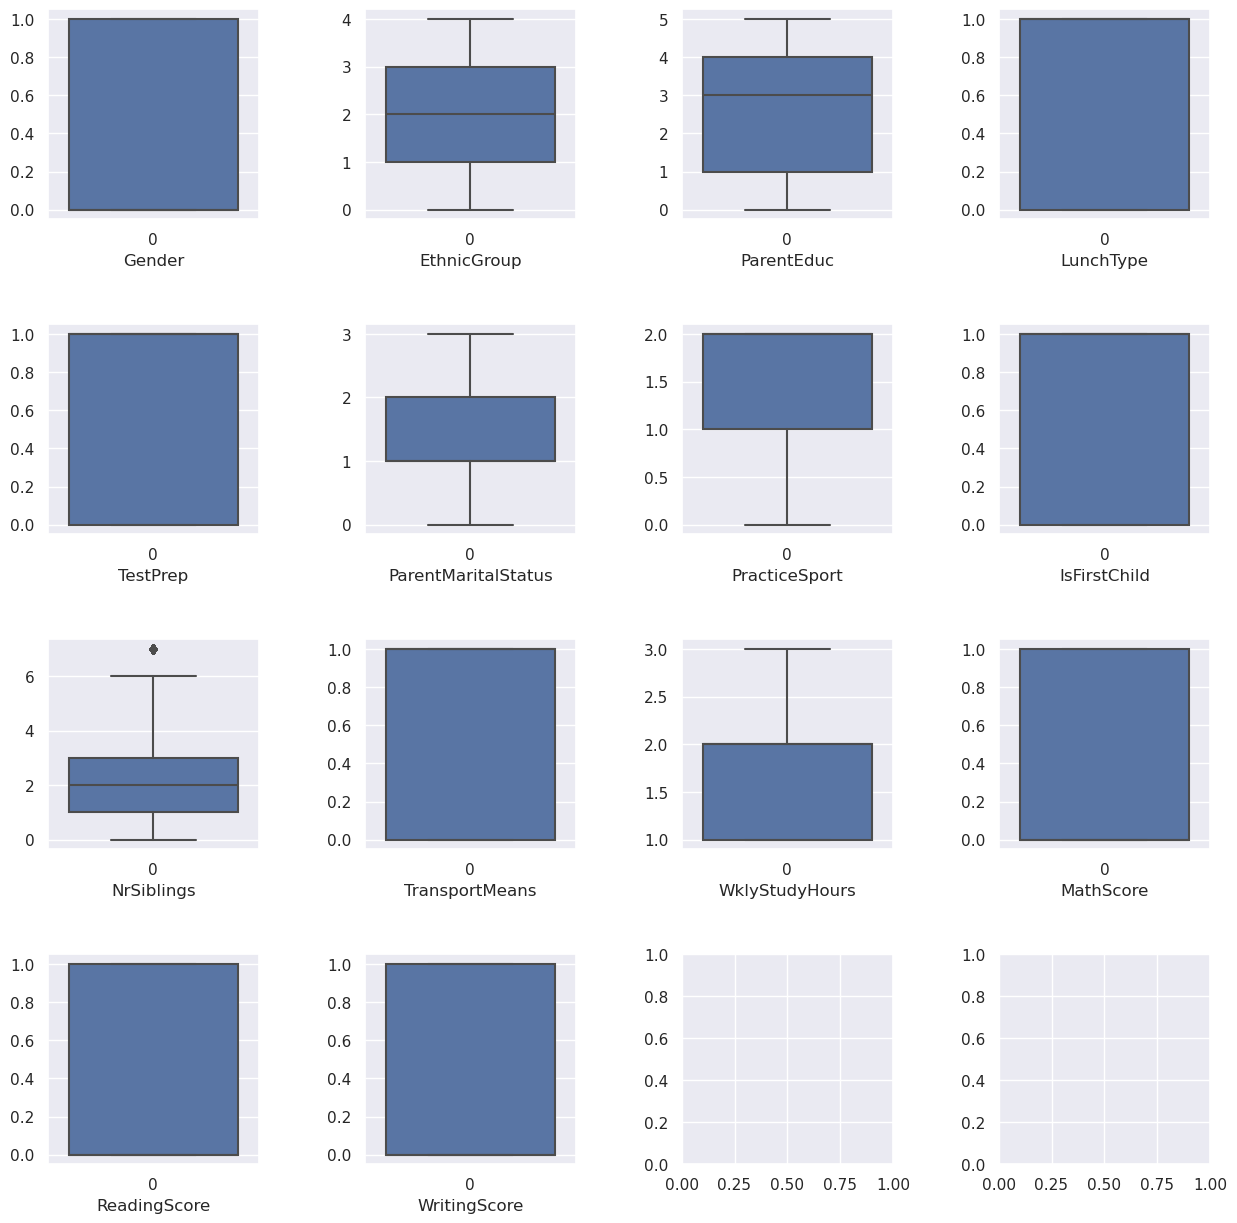

In [72]:
# create a figure with 4x4 subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterate through the columns
c = 0

# create rows of subplots
for k in range(4):
    
    # columns of subplot
    for i in range(4):     
        if c < 14:
            sns.boxplot(data[data.columns[c]], ax=ax[k][i])
            ax[k][i].set_xlabel(data.columns[c])
            c += 1

plt.show()

In [73]:
# check to see where the outliers are based on the above visuals
outlier_df = data.loc[(data['Gender'] > 1) | (data['EthnicGroup'] > 4) | 
          (data['ParentEduc']> 5) | (data['LunchType']> 1) |
          (data['TestPrep']> 1) | (data['ParentMaritalStatus'] > 3) | 
          (data['PracticeSport'] > 2) | (data['IsFirstChild'] > 1)| 
          (data['NrSiblings'] > 6) | (data['TransportMeans'] > 1) | 
          (data['WklyStudyHours'] > 3) | (data['MathScore'] > 1) | 
          (data['ReadingScore'] > 1) | (data['WritingScore'] > 1)]

outlier_df.head()

Gender  EthnicGroup  ParentEduc  LunchType  TestPrep  \
91        1            1           4          1         1   
183       1            4           2          0         1   
287       1            0           4          1         1   
409       1            2           4          0         0   
441       1            0           2          0         0   

     ParentMaritalStatus  PracticeSport  IsFirstChild  NrSiblings  \
91                     1              2             0           7   
183                    1              2             0           7   
287                    1              2             1           7   
409                    1              2             0           7   
441                    1              1             0           7   

     TransportMeans  WklyStudyHours  MathScore  ReadingScore  WritingScore  
91                1               2          1             0             0  
183               0               3          0             0             0  
287               0               2          0             0             0  
409               0               2          0             0             0  
441               1               3          1             0             0

In [74]:
# it looks like the number of siblins is the only outlier
# when I change the numbers above, siblings is the only value that makes a different outlier list
index_list = list(outlier_df.index)
print(index_list)

[91, 183, 287, 409, 441, 546, 617, 802, 828, 868, 942, 1324, 1356, 1464, 1466, 1481, 1499, 1602, 1623, 1820, 1837, 1877, 1955, 2079, 2278, 2289, 2315, 2473, 2525, 2561, 2610, 3008, 3045, 3375, 3376, 3407, 3793, 3911, 4172, 4233, 4420, 4670, 4676, 4751, 4752, 4945, 5011, 5273, 5374, 5477, 5567, 5949, 5994, 6106, 6141, 6254, 6346, 6573, 6661, 6894, 6962, 7123, 7136, 7207, 7252, 7509, 7526, 7574, 7663, 7677, 7924, 7940, 7971, 8230, 8296, 8458, 8674, 8731, 8747, 8911, 9026, 9125, 9198, 9268, 9499, 9546, 9762, 9773, 9820, 9846, 9932, 10230, 10482, 10520, 10545, 10822, 10918, 11166, 11205, 11283, 11357, 11396, 11426, 11442, 11542, 11655, 11661, 11759, 11860, 12296, 12438, 12580, 12815, 13076, 13095, 13202, 13306, 13346, 13349, 13482, 13549, 13562, 13697, 13782, 13929, 14186, 14249, 14488, 14597, 14611, 14641, 14722, 14748, 14826, 14863, 14889, 14903, 14910, 15033, 15159, 15179, 15257, 15487, 15566, 15586, 15626, 15721, 15738, 15944, 15945, 16071, 16260, 16378, 16467, 16550, 16581, 16613, 166

In [75]:
# there are 291 cases of students with 7 or greater siblings
# that seems like a large section to remove although 291/30641 is only .009497
# I might try to train with the >6 siblings later just to see what happens
print(len(index_list))

291


In [76]:
data_dropped_outlier = data.drop(index_list)
print(len(data_dropped_outlier))

30350


In [77]:
outlier_percentage = (len(outlier_df)/len(data)) * 100
print(f"The percentage of data points removed from the dataset is {outlier_percentage}%")

The percentage of data points removed from the dataset is 0.9497079077053621%


# Planning for Machine Learning Models

With a dataset size of 30,350 data points and 14 features, and three different outcomes to predict (pass or fail for each outcome), I have to find a suitable model for a classification problem with multi-labels. 

## Models that are not a good fit for this project

Most machine learning models can be adapted and experimented with for different projects, but there are a few that I already know would not be the best fit for this project. My project has a pass/fail output, 14 features, and a dataset of 30,350 data points.

#### Linear Regression-
Linear regression is used for predicting continuous numeric values and would not be suited for binary outcomes.

#### Nearest Centroid-
this is a method we learned about in another CU class I am taking. The nearest centroid classifier calculates the centroid (a central point) for clustering, and it then assigns each data point to the class with the closest centroid. I do not think this would be a good fit for the high-demensional dataset with which I am working.

## Models that are a good fit for this project

The following three models are the models that are best fit for the classification task of this project. I took into consideration: ability to handle classification tasks, algorithm complexity, efficiency, ability to handle large sets of features and data, and ease of interpretation.

### Model 1: K-Nearest Neighbors (KNN)

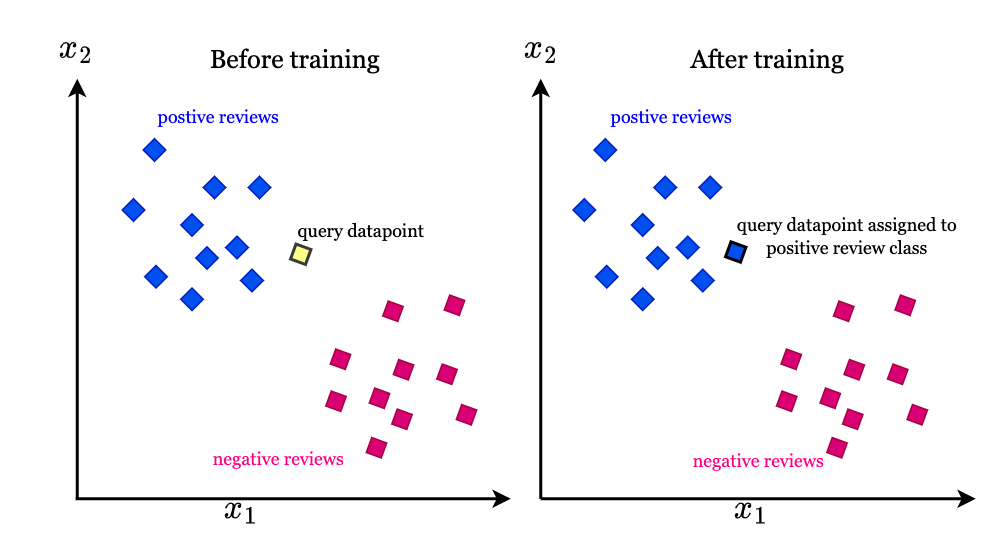

#### Reasoning:
K-Nearest Neighbors (KNN) is a good choice for several reasons, especially in scenarios with specific characteristics such as this multi-label classification problem. KNN is able to handle multi-label tasks, such as this dataset with three output pass-or-fail variables. Because KNN is robust in various situations, it is also able to work with irregular decision boundaries and complex relationships between features. Because we've already discussed KNN in this course, I feel the results will be easy for me to interperet and explain, as well. 
#### Potential Problems:
KNN is sensitve to scaling since it relies on distances between points to make predictions. The data may need normalized, and I could do this by scaling the features to a specific range to be sure they are all on a similar scale.

### Model 2: Naive Bayes

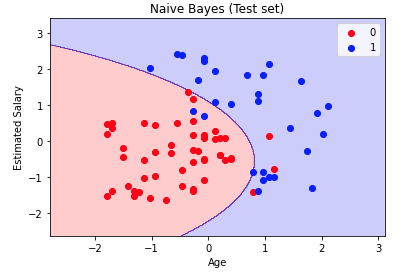

#### Reasoning:
Naive Bayes is a simple and computationally efficient algorithm that we learned in class, and that I understand fairly well. Naive Bayes works on an independence assumption, and even though these assumptions may not hold in real-world scenarios, the model will still perform well. Naive Bayes will be a good baseline to compare with the results and gauge the performance of my other model choices which have more complex algorithms. 
#### Potential Problems:
Naive Bayes assumes independence among features, so the results may not optimal if the features are overly dependent. To deal with this, I can identify and separate highly correlated features to reduce the impact on the model.

### Model 3: Neural Network

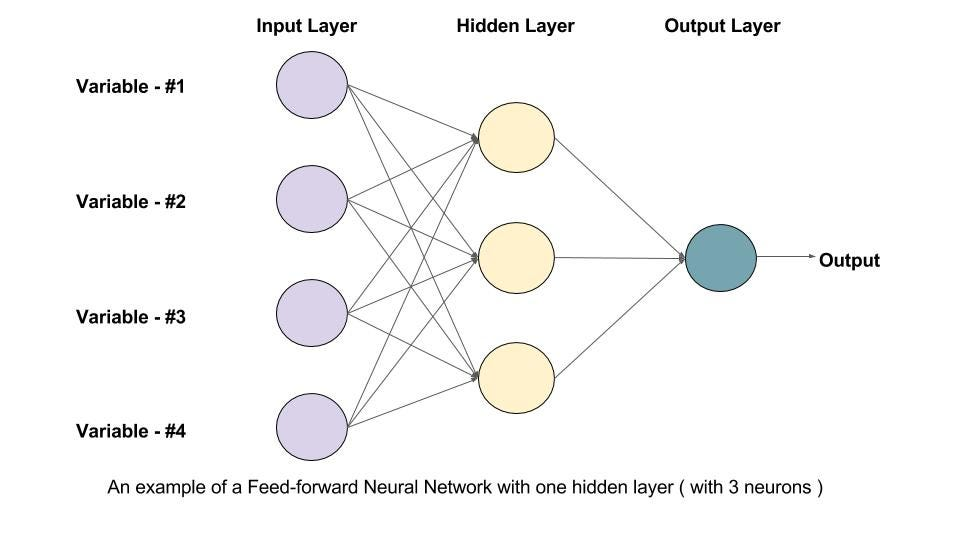

#### Reasoning: 
Neural networks architecture is so complex and interesting. There are a lot of neural network libraries, but I would like to use Tensorflow to implement one to use with this dataset. Neural networks excel at capturing complex non-linear relationships, and since the 14 features in this dataset may include intricate interactions, I think a neural network may be able to model these effectively. Neural networks like Tensorflow use activation functions and loss functions that can be adjusted to suit this project, and I think that will come in handy.

#### Potential Problems: 
Overfitting can be a problem. I will address this by hypertuning the parameters and using the dropout feature.

## The next steps for creating my models will be:


1. Split the dataset into a training set and a testing/validation set. The training set will be used to train the models, and the testing set will be used to evaluate their performance.

2. Use the models I chose to try out and check for the best fit.

3. Train each model on the training set, and evaluate its performance on the testing/validation set using appropriate metrics such as accuracy, precision, recall, F1-score, etc.

4. Compare the performance of the models and select the one that best suits my needs, considering factors like accuracy, interpretability, and computational cost.

5. Generate visualizations to guage the performace of the models and adjust as needed.

# Models, Results, and Analysis

## Model 1: K Nearest Neighbors

K-nearest neighbors (KNN) is a simple but effective machine learning algorithm that can be used for both classification and regression tasks. It works by finding the k most similar data points to a new data point and then using the labels of these k data points to predict the label of the new data point. Nearest neighbor averaging can be pretty good for small p (i.e. p<= 4) and large-is N. Nearest neighbor methods can be lousy when p is large due to the curse of dimensionality. Nearest neighbors tend to be far away in high dimensions. For this dataset, p = 15 and n is relatively small at less than a 1000 so I am anticipating that a flexible model won't provide the best fit.Nearest neighbor averaging can be pretty good for small p (i.e. p<= 4) and large-is N. Nearest neighbor methods can be lousy when p is large due to the curse of dimensionality. Nearest neighbors tend to be far away in high dimensions. For this dataset, p = 15 and n is relatively small at less than a 1000 so I am anticipating that a flexible model won't provide the best fit.

### Writing Scores

In [78]:
# Create Training, Validation, and Test Data Sets

# split up data frame
# .sample shuffles data frac uses all of it
# pass in where to split data set
# first split from 0 - 06.*length (60%) cast into int - this will be training data
# go to 0.8 - so everything between 60%-80% goes to validation
# everything from 90% - 100% will be test data

train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

In [79]:
# inspect the data
# make sure the scale is not off
# we can scale it so the values are closer to the mean and standard deviation so our data doesnt get thrown off

# create a function
def scale_dataset(dataframe, oversample=False):
  # take the data frame and assume the label is the last item
  # get the values
  x = dataframe[dataframe.columns[:-3]].values
  # use the last column
  # get the values
  y = dataframe[dataframe.columns[-1]].values
  # use sklearn StandardScaler to create a scaler
  scaler = StandardScaler()
  # take x and fit standard scaler to x and transform values
  x = scaler.fit_transform(x)
  # create 2D numpy by stacking with hstack
  # hstack takes an array and another array and horizontally stack them side by side (not on top)
  # since x is two demsional and y is a single demension vector, we need to reshape
  # reshape y, use these demsions -1 is the length of y
  data_scaled = np.hstack((x, np.reshape(y, (-1, 1))))
  return data_scaled, x, y

In [80]:
# this is the training data, we oversample it
train, x_train, y_train = scale_dataset(train, oversample=True)
# these are the validity check and the test results, we do not oversample this 
# we want to make sure we trust the model we made
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

### Hyperparameter Tuning: Find a value for k

Text(0, 0.5, 'Testing Accuracy')

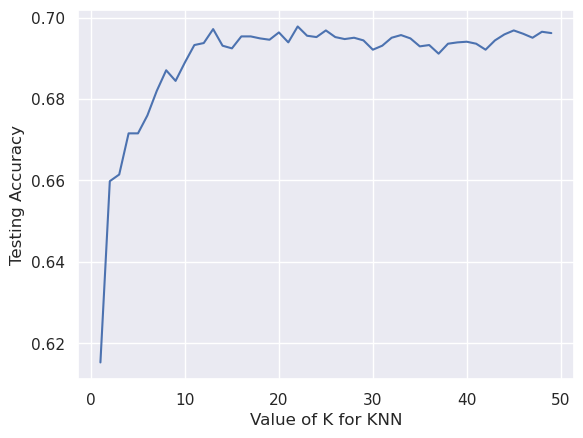

In [81]:
# choosing the optimal value of k is critical 
# Try running from k=1 through 25 and record testing accuracy
k_range = range(1, 50)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_hat)
    scores_list.append(metrics.accuracy_score(y_test, y_hat))
    
# plot the relationship between K and the testing accuracy 
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

It looks like k=22 is going to give us the best result.

In [123]:
# pass in how many neighbors we want to use
knn_model_writing = KNeighborsClassifier(n_neighbors=22)
# .fit is what trains the model
# parameters are the training sets we made
knn_model_writing = knn_model_writing.fit(x_train, y_train)
y_pred = knn_model_writing.predict(x_test)
# this is the predicted values
print(y_pred)
# this is the truth values
print(y_test)
# can use the classification report to compare the test and prediction
# accuracy is how many we gto right out of the total
# precision is saying- out of all the data points weve labeled as positive, how many are true positives
# precision = true positives / true positives and false negatives
# recall is saying- out of all the data points that are truly positive, how many did we get right
# recall = true positives / false negatives and true positives
print("Writing Classification Report:")
print(classification_report(y_test, y_pred))
print("R_Squared Measure: ")
print(r2_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
[0 1 1 ... 0 0 0]
Writing Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      4194
           1       0.58      0.28      0.38      1935

    accuracy                           0.71      6129
   macro avg       0.65      0.59      0.59      6129
weighted avg       0.68      0.71      0.67      6129

R_Squared Measure: 
-0.35262002195827913


### Reading Scores

In [125]:
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

In [126]:
# inspect the data
# make sure the scale is not off
# we can scale it so the values are closer to the mean and standard deviation so our data doesnt get thrown off

# create a function
def scale_dataset(dataframe, oversample=False):
  # take the data frame and assume the label is the last item
  # get the values
  x = dataframe[dataframe.columns[:-3]].values# + dataframe.columns[-1]].values
  # use the last column
  # get the values
  y = dataframe[dataframe.columns[-2]].values
  # use sklearn StandardScaler to create a scaler
  scaler = StandardScaler()
  # take x and fit standard scaler to x and transform values
  x = scaler.fit_transform(x)
  # create 2D numpy by stacking with hstack
  # hstack takes an array and another array and horizontally stack them side by side (not on top)
  # since x is two demsional and y is a single demension vector, we need to reshape
  # reshape y, use these demsions -1 is the length of y
  data_scaled = np.hstack((x, np.reshape(y, (-1, 1))))
  return data_scaled, x, y

In [127]:
# this is the training data, we do oversample it
train, x_train, y_train = scale_dataset(train, oversample=True)
# these are the validity check and the test results, we do not oversample it. we want to make sure we trust the model we made
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [128]:
# pass in how many neighbors we want to use
knn_model_reading = KNeighborsClassifier(n_neighbors=41)
# .fit is what trains the model
# parameters are the training sets we made
knn_model_reading = knn_model_reading.fit(x_train, y_train)
y_pred = knn_model_reading.predict(x_test)
# this is the predicted values
print(y_pred)
# this is the truth values
print(y_test)
# can use the classification report to compare the test and prediction
# accuracy is how many we gto right out of the total
# precision is saying- out of all the data points weve labeled as positive, how many are true positives
# precision = true positives / true positives and false negatives
# recall is saying- out of all the data points that are truly positive, how many did we get right
# recall = true positives / false negatives and true positives
print("Reading Classification Report:")
print(classification_report(y_test, y_pred))
print("R_Squared Measure: ")
print(r2_score(y_test, y_pred))

[0 0 0 ... 0 1 1]
[1 1 1 ... 0 1 1]
Reading Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.76      3790
           1       0.60      0.41      0.49      2339

    accuracy                           0.67      6129
   macro avg       0.65      0.62      0.62      6129
weighted avg       0.66      0.67      0.65      6129

R_Squared Measure: 
-0.39798123140823094


### Math Scores

In [135]:
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

In [136]:
# inspect the data
# make sure the scale is not off
# we can scale it so the values are closer to the mean and standard deviation so our data doesnt get thrown off

# create a function
def scale_dataset(dataframe, oversample=False):
  # take the data frame and assume the label is the last item
  # get the values
  x = dataframe[dataframe.columns[:-3]].values# + dataframe.columns[-2:-1]].values
  # use the last column
  # get the values
  y = dataframe[dataframe.columns[-3]].values
  # use sklearn StandardScaler to create a scaler
  scaler = StandardScaler()
  # take x and fit standard scaler to x and transform values
  x = scaler.fit_transform(x)
  # create 2D numpy by stacking with hstack
  # hstack takes an array and another array and horizontally stack them side by side (not on top)
  # since x is two demsional and y is a single demension vector, we need to reshape
  # reshape y, use these demsions -1 is the length of y
  data_scaled = np.hstack((x, np.reshape(y, (-1, 1))))
  return data_scaled, x, y

In [137]:
# this is the training data, we do oversample it
train, x_train, y_train = scale_dataset(train, oversample=True)
# these are the validity check and the test results, we do not oversample it. we want to make sure we trust the model we made
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [138]:
# pass in how many neighbors we want to use
knn_model_math = KNeighborsClassifier(n_neighbors=41)
# .fit is what trains the model
# parameters are the training sets we made
knn_model_math = knn_model_math.fit(x_train, y_train)
y_pred = knn_model_math.predict(x_test)
# this is the predicted values
print(y_pred)
# this is the truth values
print(y_test)
# can use the classification report to compare the test and prediction
# accuracy is how many we gto right out of the total
# precision is saying- out of all the data points weve labeled as positive, how many are true positives
# precision = true positives / true positives and false negatives
# recall is saying- out of all the data points that are truly positive, how many did we get right
# recall = true positives / false negatives and true positives
print("Math Classification Report:")
print(classification_report(y_test, y_pred))
print("R_Squared Measure: ")
print(r2_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 1]
Math Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      4229
           1       0.56      0.28      0.37      1900

    accuracy                           0.71      6129
   macro avg       0.65      0.59      0.59      6129
weighted avg       0.68      0.71      0.68      6129

R_Squared Measure: 
-0.35698261378203133


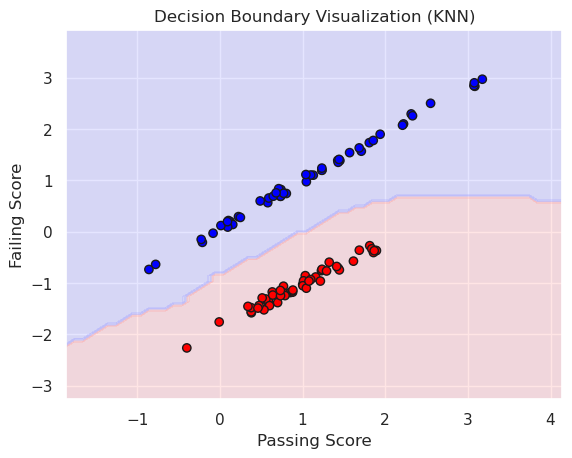

In [156]:
# plot decision boundary for visualization

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification

# pass in how many neighbors we want to use
knn_model_math = KNeighborsClassifier(n_neighbors=41)

# .fit is what trains the model
# parameters are the training sets we made
knn_model_math = knn_model_math.fit(x_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# create a colormap for the plot
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k')
plt.xlabel('Passing Score')
plt.ylabel('Failing Score')
plt.title('Decision Boundary Visualization (KNN)')
plt.show()

### Evaluation of KNN Models

Overall, based on the classification report, the KNN model seems to perform moderately well in terms of precision and accuracy for class 0 (failing), but its performance for class 1 (passing) is much lower, as indicated by lower recall, precision, and F1-score. The macro average metrics suggest that the model's performance is better for class 0 than for class 1. The negative R-squared measure is unusual.

## Model 2: Naive Bayes

Bayes tells us:What's the probability that A happened given that B happened.
The formula for calculation is: P(A|B) = P(B|A)*P(A) / P(B)
The formula for Naive Bayes for classification is: (Ck|x) = P(x|Ck)*P(Ck) / P(x)
posterior = liklihood*prior / evidence
C = classes, k = all the different kinds
x = feature, or what we're trying to fit into the categories
P(x|Ck) = what is the liklihood that x is in Ck
P(Ck) = what is the probability of this class in general
P(x) = probabilty of x

### Writing Scores

In [159]:
# Create a Gaussian Naive Bayes model
nb_model_writing = GaussianNB()

# Train the model on the training data
nb_model_writing.fit(x_train, y_train)

# Make predictions on the validation set
y_pred_valid = nb_model_writing.predict(x_valid)

# Print classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))

# Make predictions on the test set
y_pred_test = nb_model_writing.predict(x_test)

# Print classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      4178
           1       0.58      0.41      0.48      1950

    accuracy                           0.72      6128
   macro avg       0.67      0.64      0.64      6128
weighted avg       0.70      0.72      0.70      6128

Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      4229
           1       0.57      0.40      0.47      1900

    accuracy                           0.72      6129
   macro avg       0.66      0.63      0.64      6129
weighted avg       0.70      0.72      0.70      6129



In [157]:
# Create a Gaussian Naive Bayes model
nb_model_writing = GaussianNB()

# Train the model on the training data
nb_model_writing.fit(x_train, y_train)

# Make predictions on the validation set
y_pred_valid = nb_model_writing.predict(x_valid)

# Print classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))

# Make predictions on the test set
y_pred_test = nb_model_writing.predict(x_test)

# Print classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      4178
           1       0.58      0.41      0.48      1950

    accuracy                           0.72      6128
   macro avg       0.67      0.64      0.64      6128
weighted avg       0.70      0.72      0.70      6128

Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      4229
           1       0.57      0.40      0.47      1900

    accuracy                           0.72      6129
   macro avg       0.66      0.63      0.64      6129
weighted avg       0.70      0.72      0.70      6129



In [154]:
# Create a Gaussian Naive Bayes model
nb_model_reading = GaussianNB()

# Train the model on the training data
nb_model_reading.fit(x_train, y_train)

# Make predictions on the validation set
y_pred_valid = nb_model_reading.predict(x_valid)

# Print classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))

# Make predictions on the test set
y_pred_test = nb_model_reading.predict(x_test)

# Print classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      4178
           1       0.58      0.41      0.48      1950

    accuracy                           0.72      6128
   macro avg       0.67      0.64      0.64      6128
weighted avg       0.70      0.72      0.70      6128

Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      4229
           1       0.57      0.40      0.47      1900

    accuracy                           0.72      6129
   macro avg       0.66      0.63      0.64      6129
weighted avg       0.70      0.72      0.70      6129



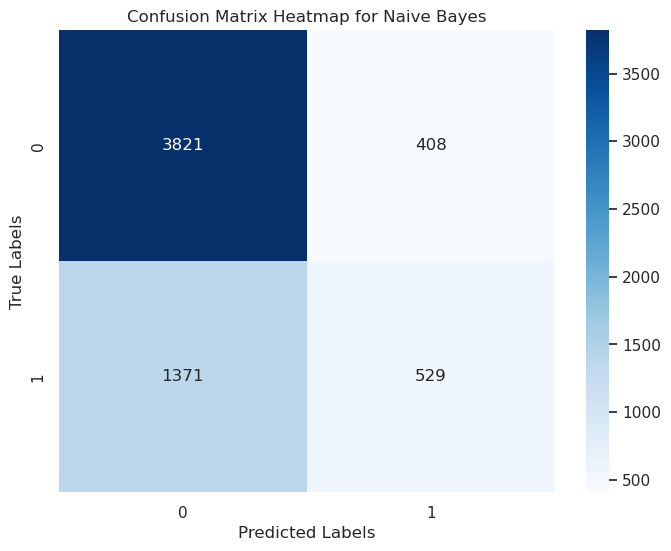

In [161]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Heatmap for Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Evaluation of Naive Bayes

The model demonstrated relatively balanced precision and recall scores for class 0, achieving 76% precision and 86% recall, indicating accurate classification of instances belonging to this class. However, for class 1, the model exhibited lower precision (58%) and recall (41%), suggesting room for improvement in identifying instances of this class. The F1-scores further emphasized this pattern, with class 0 achieving a commendable 0.81 while class 1 lagged behind at 0.48. The overall accuracy on the validation set was 72%, suggesting a moderate ability to correctly predict class labels. 

## Model 3: Nueral Network

In [112]:
# Tensorflow helps define and train models
# keras is part of Tensorflow
# sequential means one layer to the next
# dense layer means all nodes are connected

# nueral net model
import tensorflow as tf

def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  # create model and pass in layers
  nn_model = tf.keras.Sequential([
      # 1st layer
      # pass in 32 units (nodes), relu activation (rectified linear unit), add shape since its the first layer
      # play with the number of nodes to try different trainings
      # see what works best
      tf.keras.layers.Dense(num_nodes, activation= 'relu', input_shape=(11,)),
      # add a dropout layer- randomly choose nodes at this rate, and dont train them in a certain iteration
      # prevents overfitting
      tf.keras.layers.Dropout(dropout_prob),
      # 2nd layer
      # 32 units (nodes), use relu, dont need shape this time
      tf.keras.layers.Dense(num_nodes, activation= 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      # final layer, output layer
      # one node, activation is Sigmoid- we want our predictions to be 0 or 1, so we can classify with 0 or 1
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # compile it
  # Adam is the learnign rate
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  # now we need to train it
  # tensorflow keeps track of histry- which is cool because we can use that to plot the results
  history = nn_model.fit(
      # tensorflow uses
      x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0 # if you dont want to see the printed data, comment this out
  )

  # return the model and the history of that model
  return nn_model, history

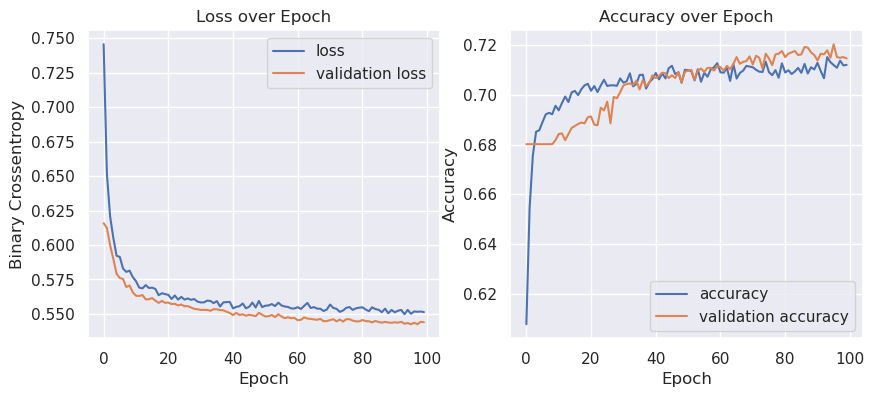

In [115]:
# notes: run the cell below first

# from tensorflow
# predefinied- upi can find them and use them
# plot loss over all the different training cycles (called epochs)
# we can call these later to see our results
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='validation loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.set_title('Loss over Epoch')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='validation accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Accuracy over Epoch')
  ax2.legend()
  ax2.grid(True)

  plt.show()

# add accuracy to the loss plot above to make it side by side
# def plot_accuracy(history):
#   ax1.plot(history.history['accuracy'], label='accuracy')
#   ax1.plot(history.history['val_accuracy'], label='val_accuracy')
#   ax1.xlabel('Epoch')
#   ax1.ylabel('Accuracy')
#   ax1.title('Accuracy over Epoch')
#   ax1.legend()
#   ax1.grid(True)
#   ax1.show()

# practing
plot_history(history)

16 nodes, dropout 0, lr 0.01, batch size 32, epochs 100


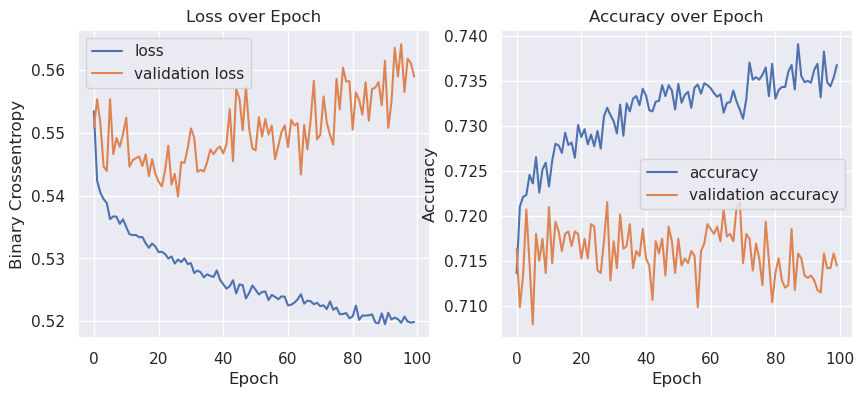

192/192 [==============================] - 0s 891us/step - loss: 0.5680 - accuracy: 0.7185
16 nodes, dropout 0, lr 0.01, batch size 64, epochs 100


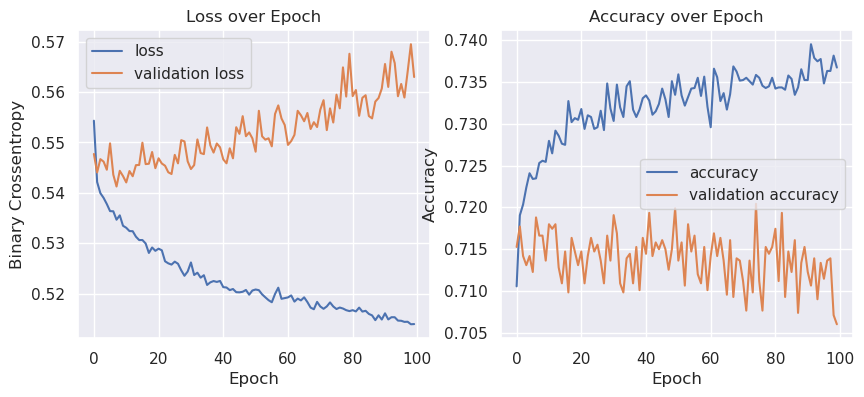

192/192 [==============================] - 0s 899us/step - loss: 0.5612 - accuracy: 0.7174
16 nodes, dropout 0, lr 0.01, batch size 128, epochs 100


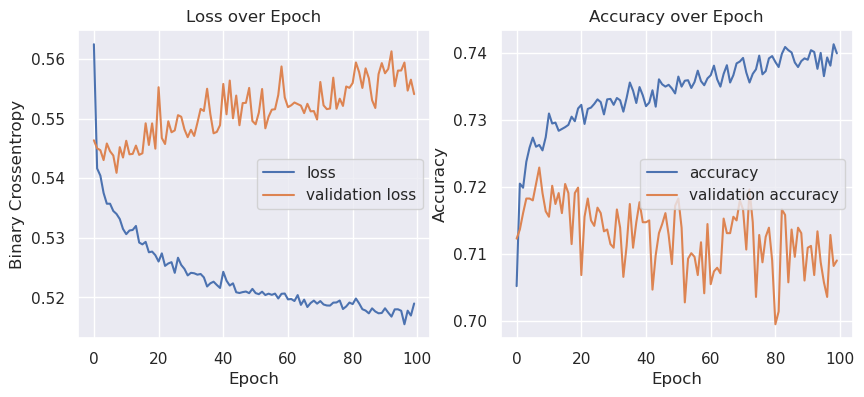

192/192 [==============================] - 0s 860us/step - loss: 0.5581 - accuracy: 0.7045
16 nodes, dropout 0, lr 0.005, batch size 32, epochs 100


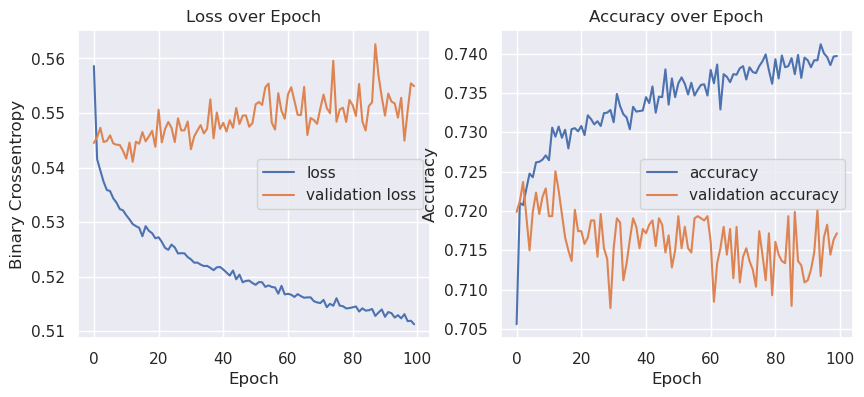

192/192 [==============================] - 0s 856us/step - loss: 0.5771 - accuracy: 0.7086
16 nodes, dropout 0, lr 0.005, batch size 64, epochs 100


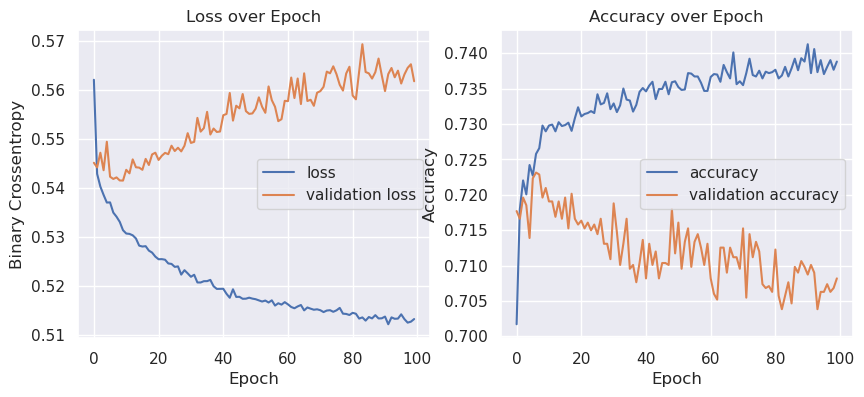

192/192 [==============================] - 0s 864us/step - loss: 0.5686 - accuracy: 0.7086
16 nodes, dropout 0, lr 0.005, batch size 128, epochs 100


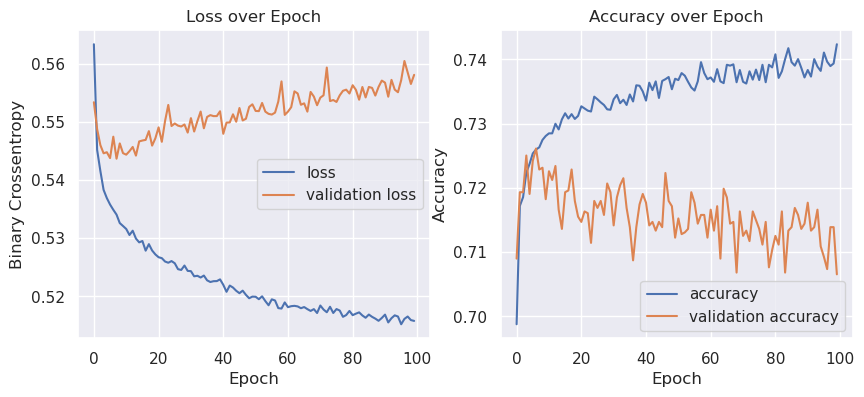

192/192 [==============================] - 0s 863us/step - loss: 0.5618 - accuracy: 0.7092
16 nodes, dropout 0, lr 0.001, batch size 32, epochs 100


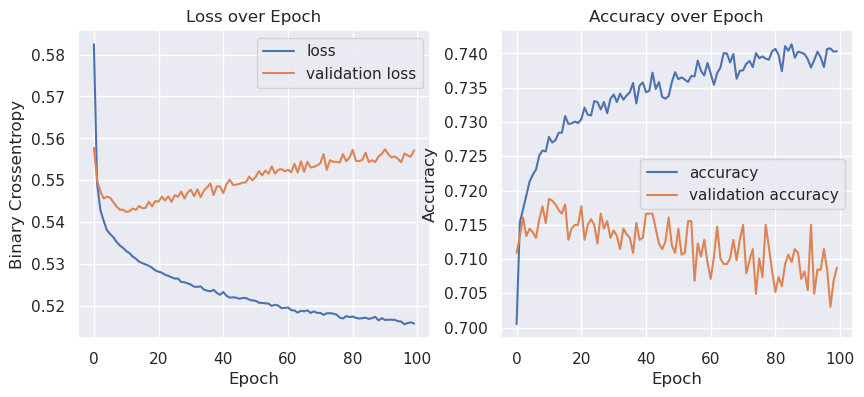

192/192 [==============================] - 0s 836us/step - loss: 0.5545 - accuracy: 0.7100
16 nodes, dropout 0, lr 0.001, batch size 64, epochs 100


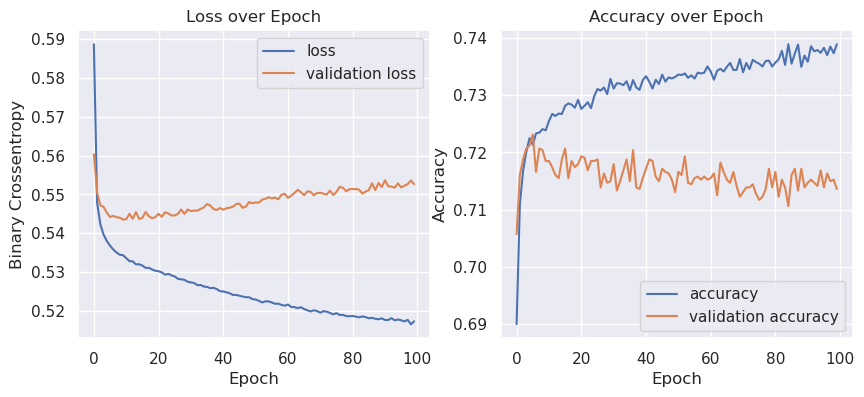

192/192 [==============================] - 0s 878us/step - loss: 0.5534 - accuracy: 0.7151
16 nodes, dropout 0, lr 0.001, batch size 128, epochs 100


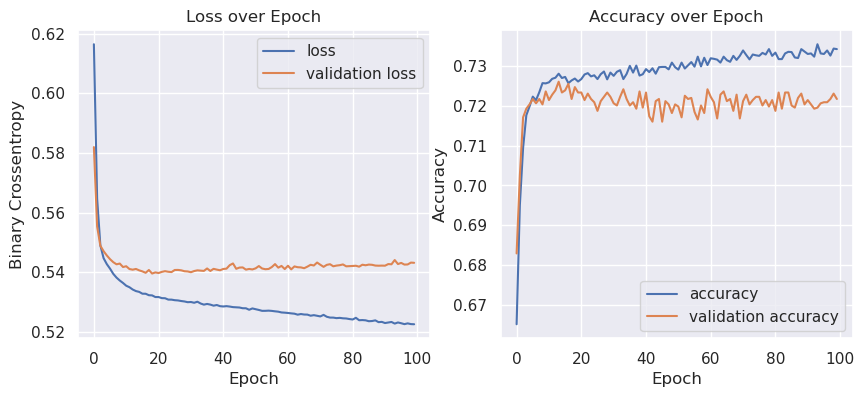

192/192 [==============================] - 0s 893us/step - loss: 0.5488 - accuracy: 0.7123
16 nodes, dropout 0.8, lr 0.01, batch size 32, epochs 100


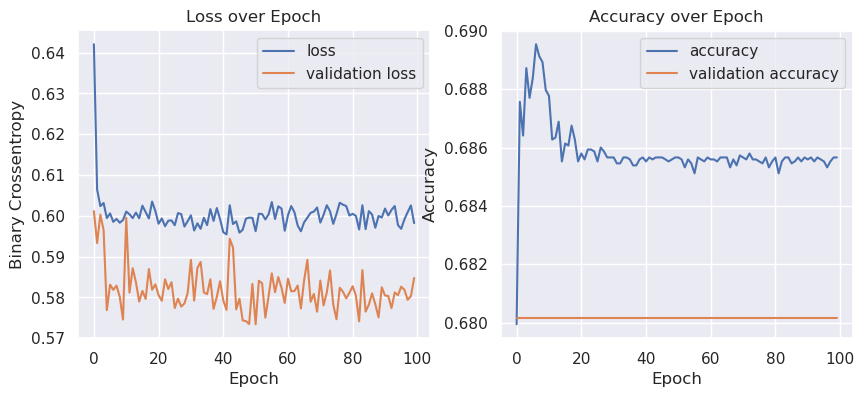

192/192 [==============================] - 0s 865us/step - loss: 0.5867 - accuracy: 0.6800
16 nodes, dropout 0.8, lr 0.01, batch size 64, epochs 100


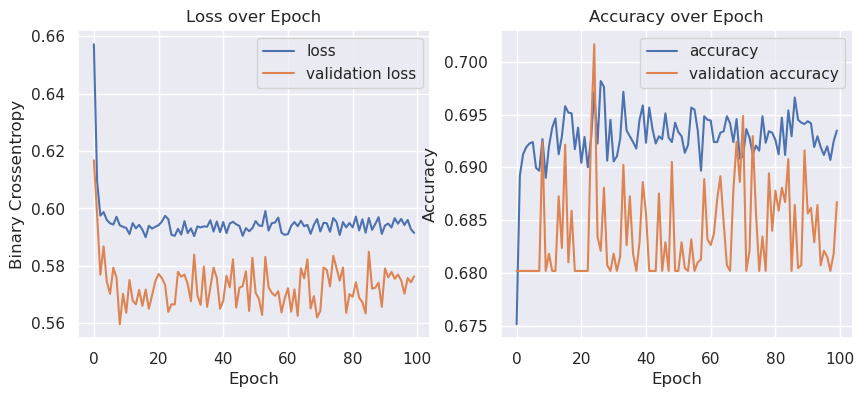

192/192 [==============================] - 0s 864us/step - loss: 0.5768 - accuracy: 0.6854
16 nodes, dropout 0.8, lr 0.01, batch size 128, epochs 100


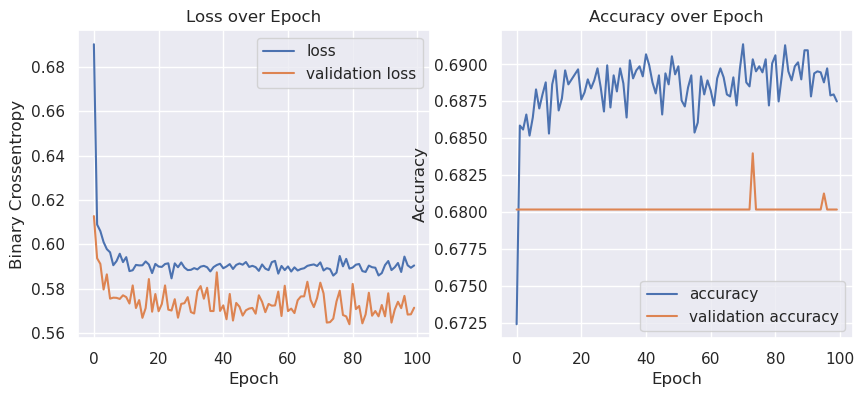

192/192 [==============================] - 0s 892us/step - loss: 0.5714 - accuracy: 0.6800
16 nodes, dropout 0.8, lr 0.005, batch size 32, epochs 100


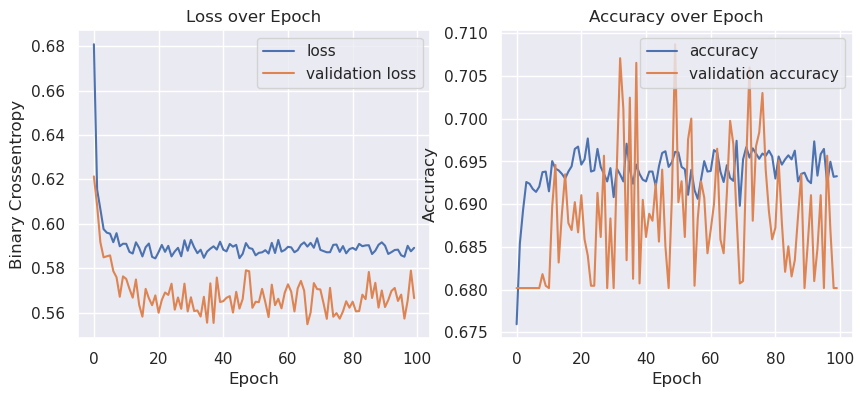

192/192 [==============================] - 0s 865us/step - loss: 0.5665 - accuracy: 0.6800
16 nodes, dropout 0.8, lr 0.005, batch size 64, epochs 100


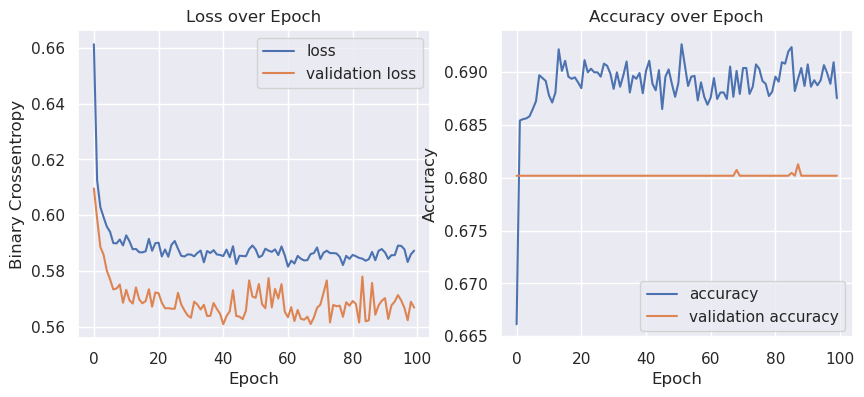

192/192 [==============================] - 0s 860us/step - loss: 0.5672 - accuracy: 0.6800
16 nodes, dropout 0.8, lr 0.005, batch size 128, epochs 100


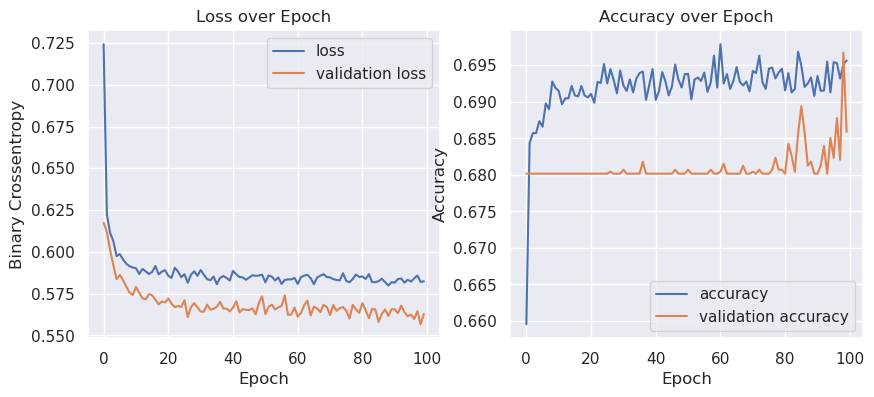

192/192 [==============================] - 0s 863us/step - loss: 0.5633 - accuracy: 0.6846
16 nodes, dropout 0.8, lr 0.001, batch size 32, epochs 100


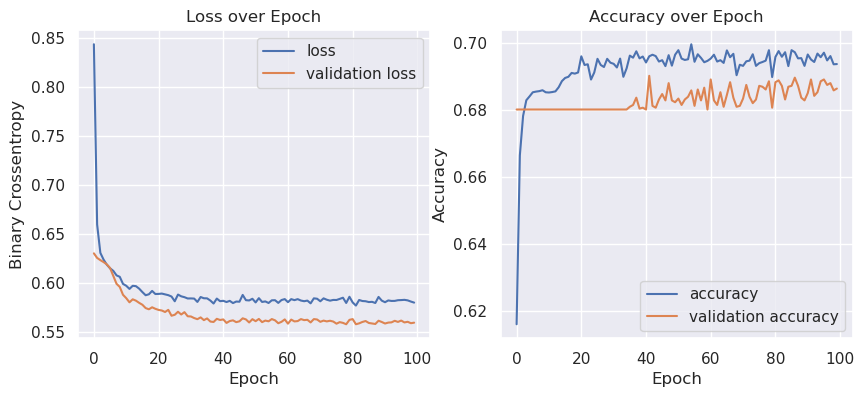

192/192 [==============================] - 0s 864us/step - loss: 0.5600 - accuracy: 0.6851
16 nodes, dropout 0.8, lr 0.001, batch size 64, epochs 100


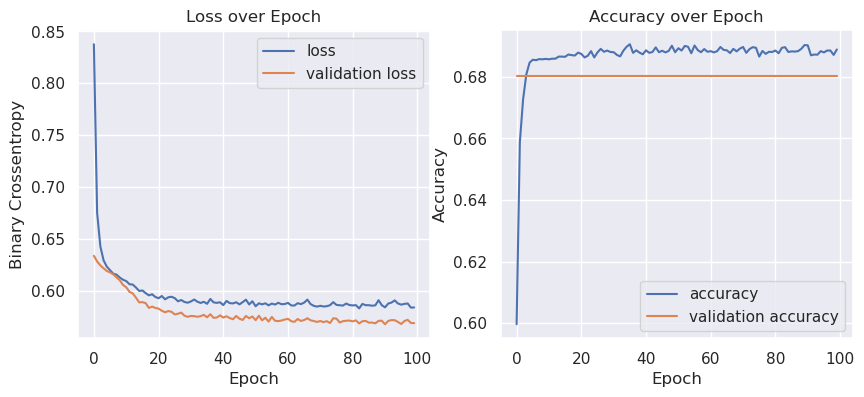

192/192 [==============================] - 0s 873us/step - loss: 0.5689 - accuracy: 0.6800
16 nodes, dropout 0.8, lr 0.001, batch size 128, epochs 100


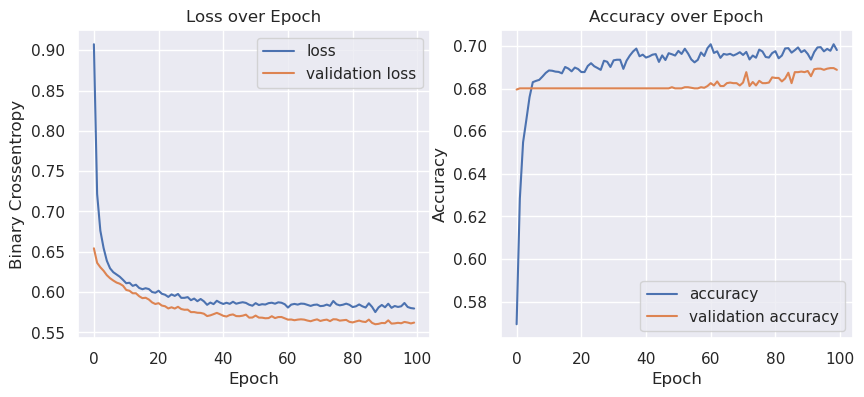

192/192 [==============================] - 0s 900us/step - loss: 0.5622 - accuracy: 0.6886
32 nodes, dropout 0, lr 0.01, batch size 32, epochs 100


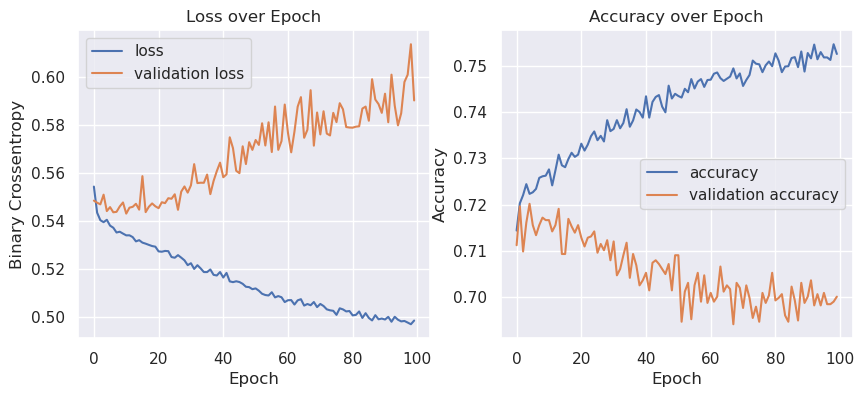

192/192 [==============================] - 0s 884us/step - loss: 0.6008 - accuracy: 0.6984
32 nodes, dropout 0, lr 0.01, batch size 64, epochs 100


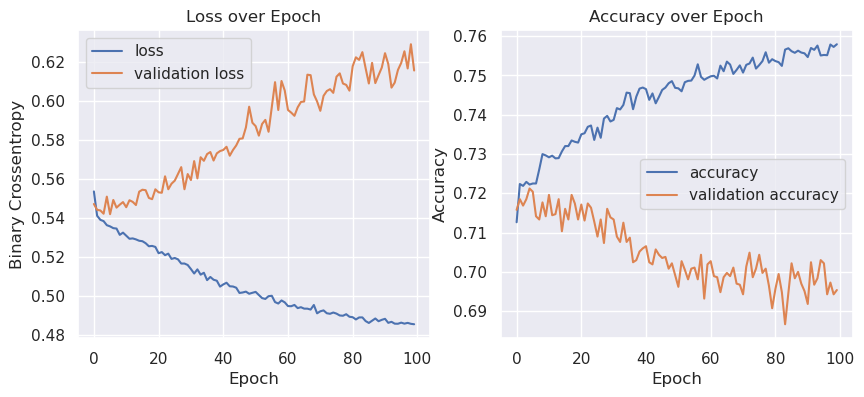

192/192 [==============================] - 0s 882us/step - loss: 0.6084 - accuracy: 0.6965
32 nodes, dropout 0, lr 0.01, batch size 128, epochs 100


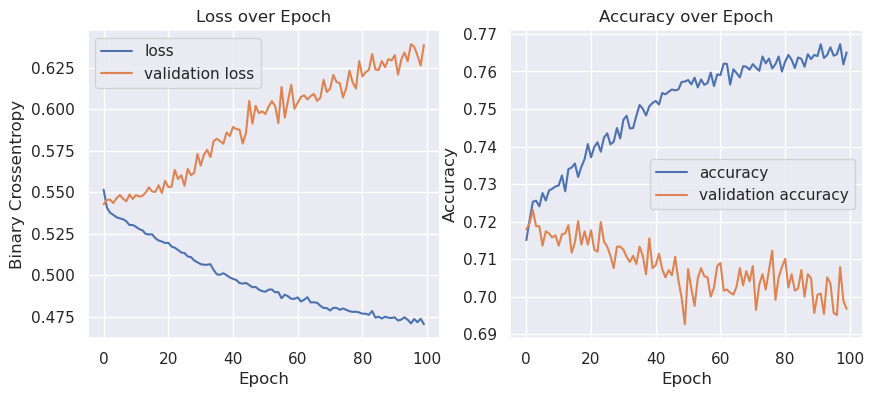

192/192 [==============================] - 0s 899us/step - loss: 0.6270 - accuracy: 0.6849
32 nodes, dropout 0, lr 0.005, batch size 32, epochs 100


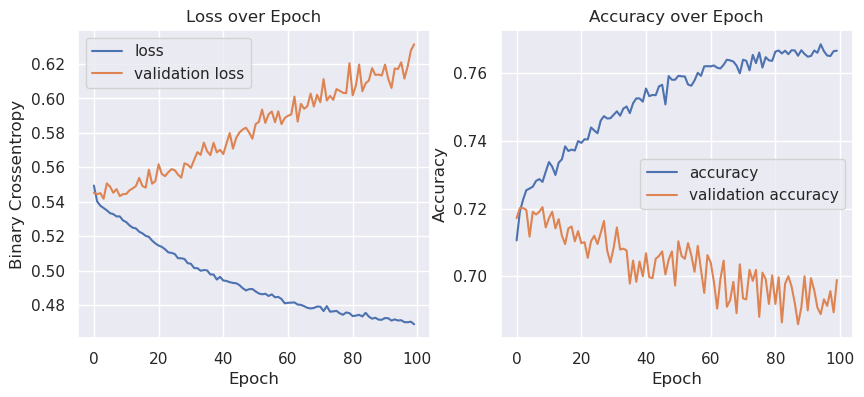

192/192 [==============================] - 0s 873us/step - loss: 0.6511 - accuracy: 0.6955
32 nodes, dropout 0, lr 0.005, batch size 64, epochs 100


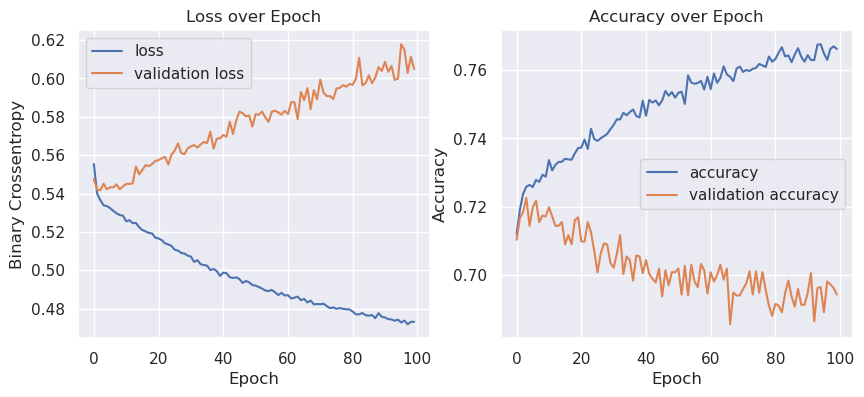

192/192 [==============================] - 0s 877us/step - loss: 0.6281 - accuracy: 0.6927
32 nodes, dropout 0, lr 0.005, batch size 128, epochs 100


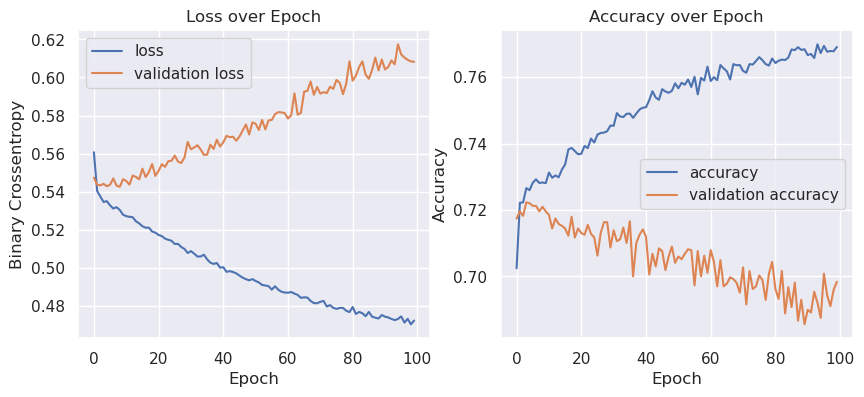

192/192 [==============================] - 0s 917us/step - loss: 0.6185 - accuracy: 0.6916
32 nodes, dropout 0, lr 0.001, batch size 32, epochs 100


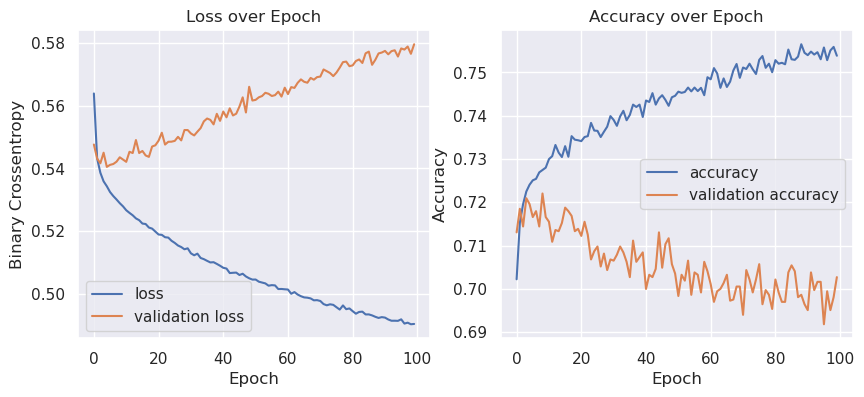

192/192 [==============================] - 0s 866us/step - loss: 0.5772 - accuracy: 0.7074
32 nodes, dropout 0, lr 0.001, batch size 64, epochs 100


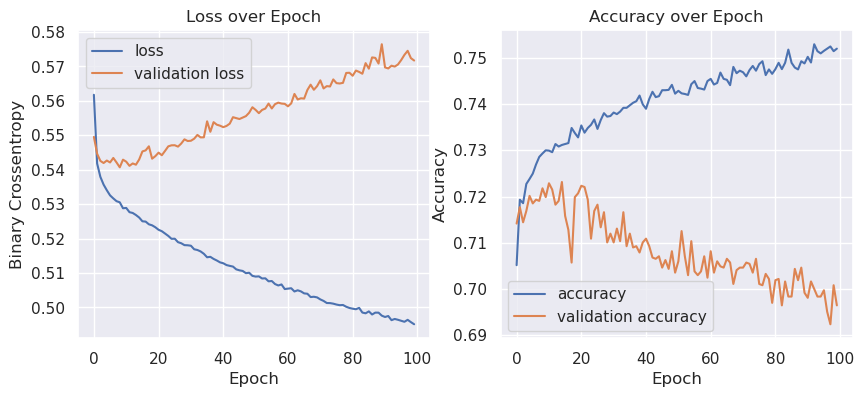

192/192 [==============================] - 0s 849us/step - loss: 0.5705 - accuracy: 0.7089
32 nodes, dropout 0, lr 0.001, batch size 128, epochs 100


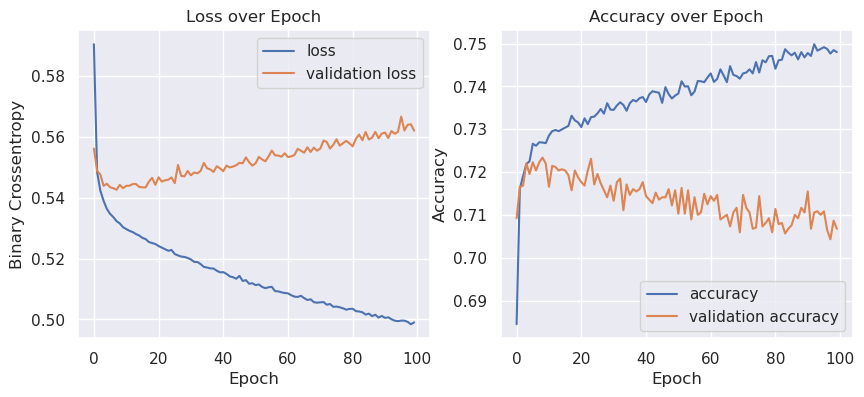

192/192 [==============================] - 0s 903us/step - loss: 0.5653 - accuracy: 0.7064
32 nodes, dropout 0.8, lr 0.01, batch size 32, epochs 100


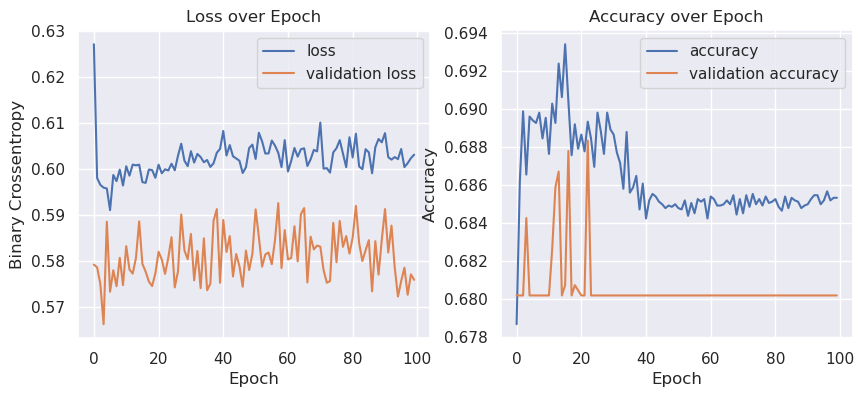

192/192 [==============================] - 0s 861us/step - loss: 0.5755 - accuracy: 0.6800
32 nodes, dropout 0.8, lr 0.01, batch size 64, epochs 100


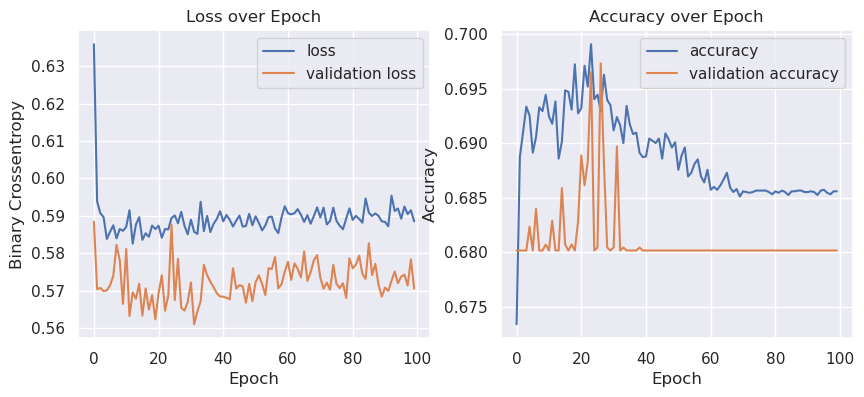

192/192 [==============================] - 0s 878us/step - loss: 0.5705 - accuracy: 0.6800
32 nodes, dropout 0.8, lr 0.01, batch size 128, epochs 100


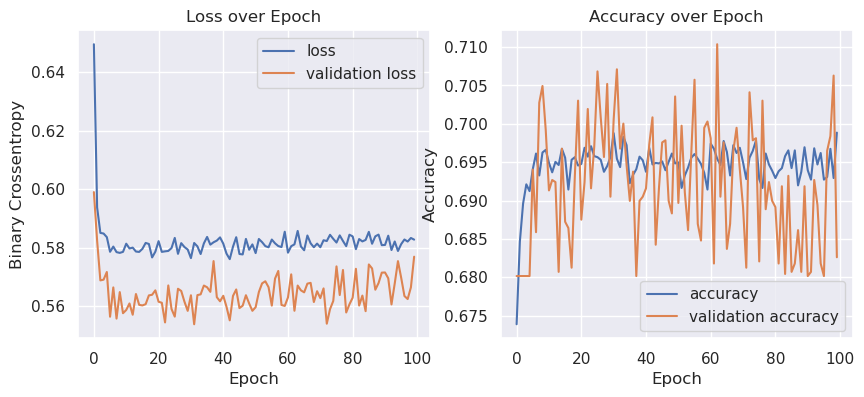

192/192 [==============================] - 1s 6ms/step - loss: 0.5793 - accuracy: 0.6821
32 nodes, dropout 0.8, lr 0.005, batch size 32, epochs 100


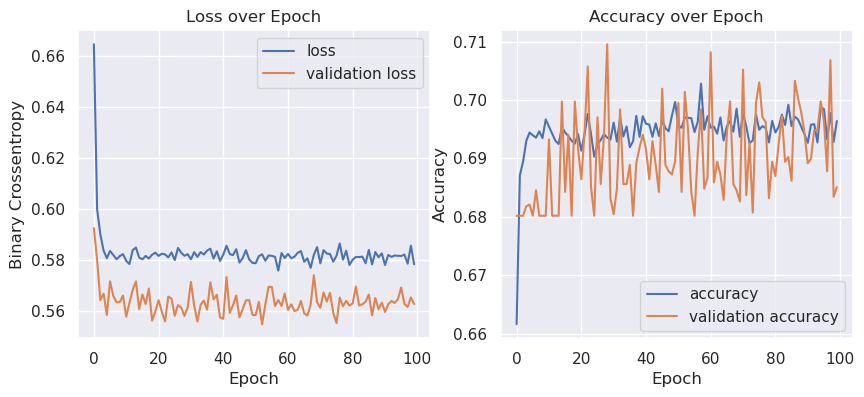

192/192 [==============================] - 0s 876us/step - loss: 0.5630 - accuracy: 0.6849
32 nodes, dropout 0.8, lr 0.005, batch size 64, epochs 100


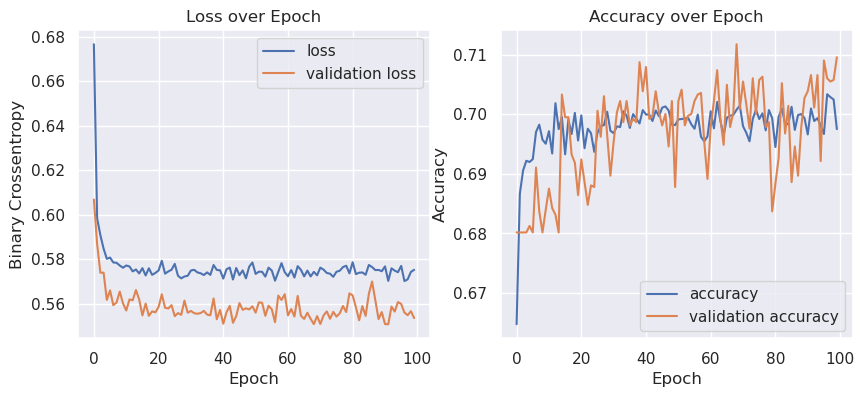

192/192 [==============================] - 0s 973us/step - loss: 0.5540 - accuracy: 0.7077
32 nodes, dropout 0.8, lr 0.005, batch size 128, epochs 100


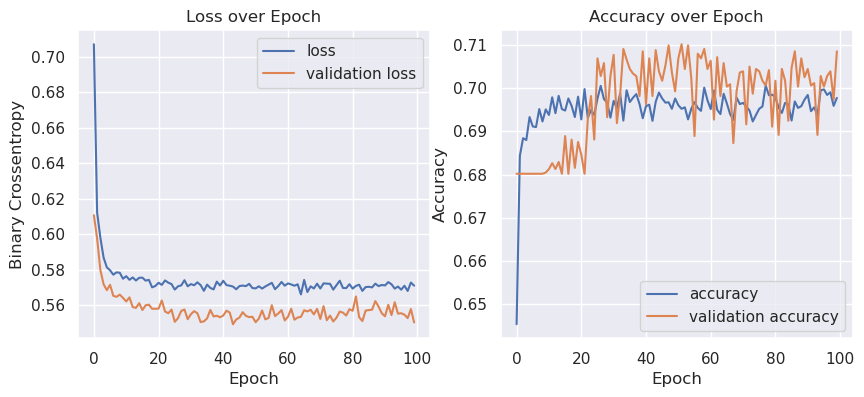

192/192 [==============================] - 0s 882us/step - loss: 0.5528 - accuracy: 0.7040
32 nodes, dropout 0.8, lr 0.001, batch size 32, epochs 100


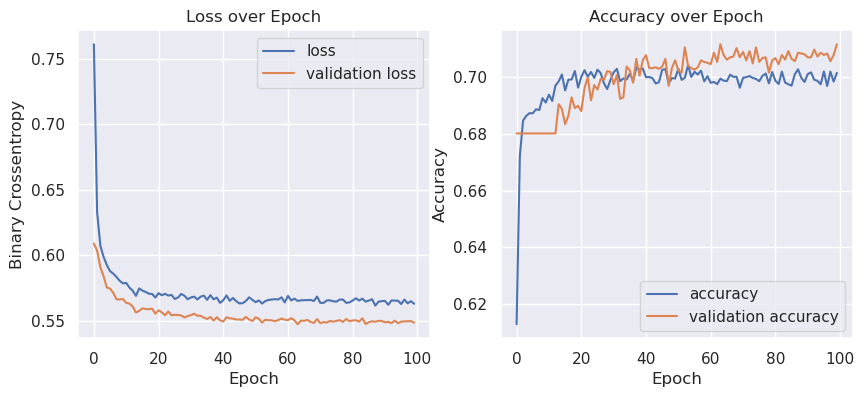

192/192 [==============================] - 0s 975us/step - loss: 0.5501 - accuracy: 0.7112
32 nodes, dropout 0.8, lr 0.001, batch size 64, epochs 100


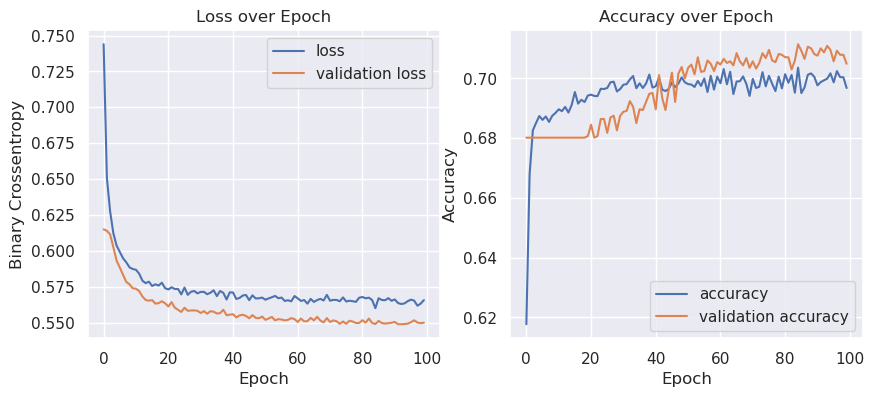

192/192 [==============================] - 0s 856us/step - loss: 0.5510 - accuracy: 0.7051
32 nodes, dropout 0.8, lr 0.001, batch size 128, epochs 100


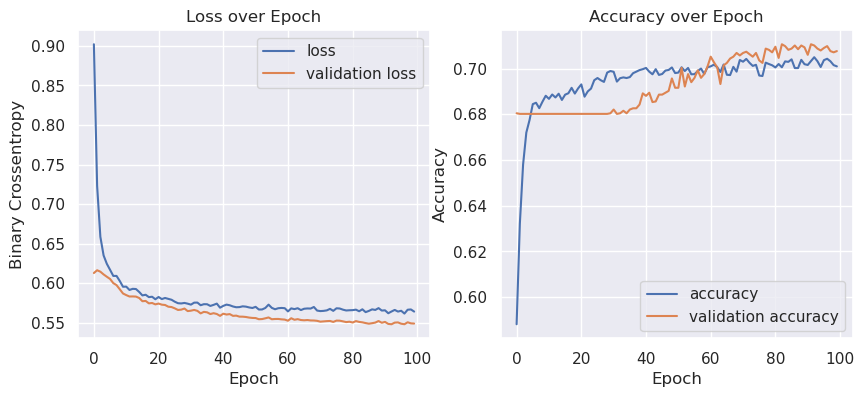

192/192 [==============================] - 0s 848us/step - loss: 0.5506 - accuracy: 0.7097
63 nodes, dropout 0, lr 0.01, batch size 32, epochs 100


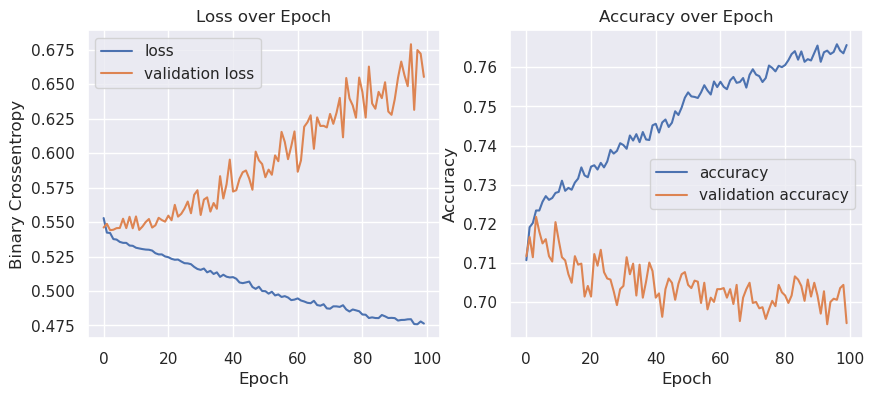

192/192 [==============================] - 0s 915us/step - loss: 0.6467 - accuracy: 0.6986
63 nodes, dropout 0, lr 0.01, batch size 64, epochs 100


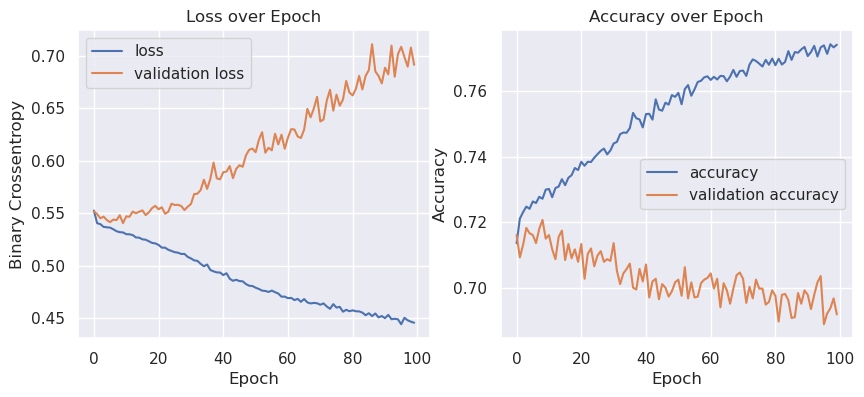

192/192 [==============================] - 0s 863us/step - loss: 0.7050 - accuracy: 0.6855
63 nodes, dropout 0, lr 0.01, batch size 128, epochs 100


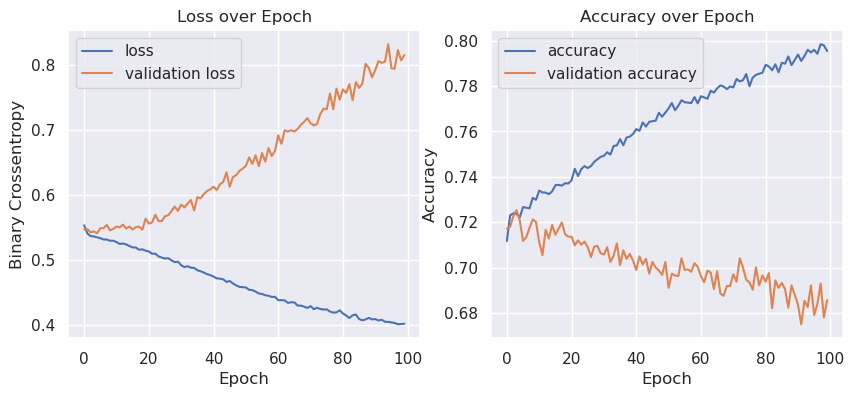

192/192 [==============================] - 0s 923us/step - loss: 0.8455 - accuracy: 0.6715
63 nodes, dropout 0, lr 0.005, batch size 32, epochs 100


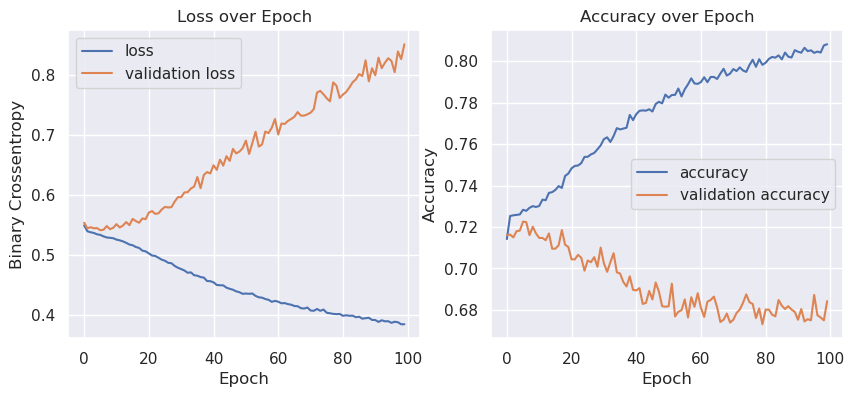

192/192 [==============================] - 0s 886us/step - loss: 0.8574 - accuracy: 0.6790
63 nodes, dropout 0, lr 0.005, batch size 64, epochs 100


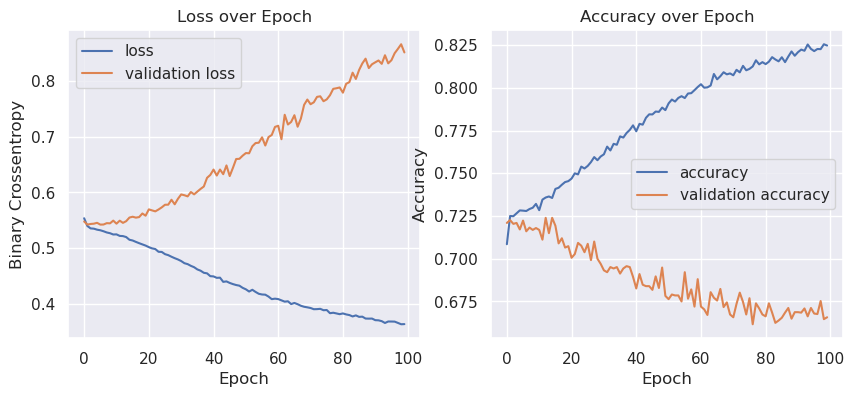

192/192 [==============================] - 0s 942us/step - loss: 0.8627 - accuracy: 0.6581
63 nodes, dropout 0, lr 0.005, batch size 128, epochs 100


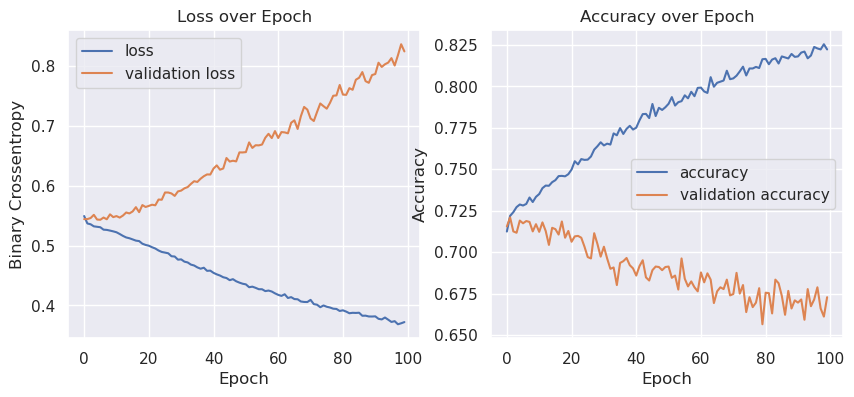

192/192 [==============================] - 0s 882us/step - loss: 0.8358 - accuracy: 0.6715
63 nodes, dropout 0, lr 0.001, batch size 32, epochs 100


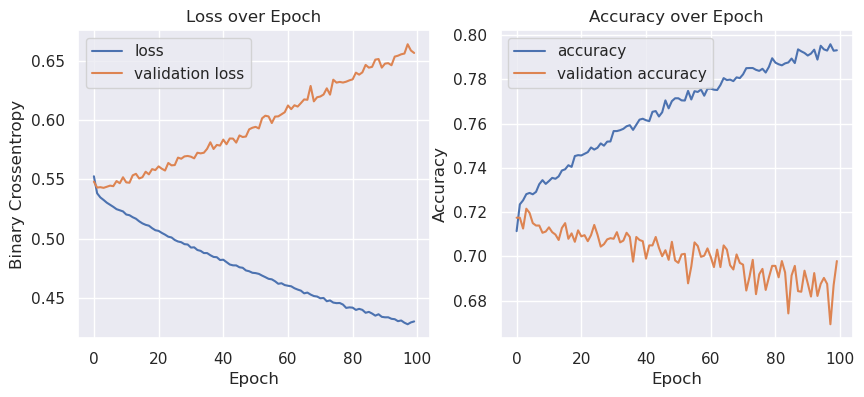

192/192 [==============================] - 0s 903us/step - loss: 0.6654 - accuracy: 0.6820
63 nodes, dropout 0, lr 0.001, batch size 64, epochs 100


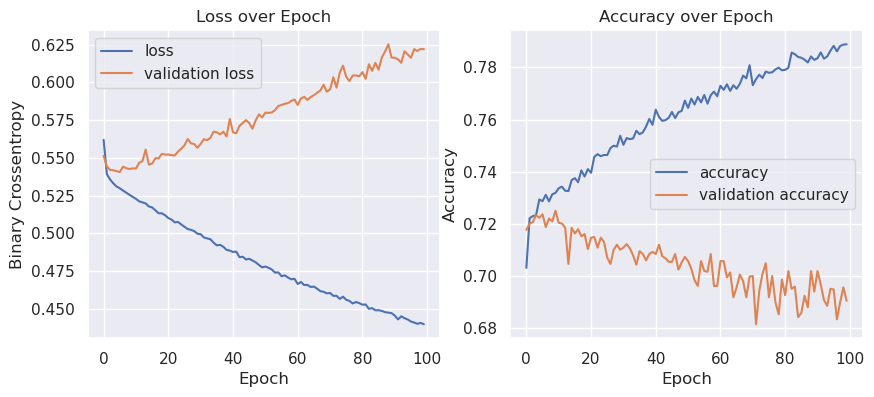

192/192 [==============================] - 0s 929us/step - loss: 0.6387 - accuracy: 0.6837
63 nodes, dropout 0, lr 0.001, batch size 128, epochs 100


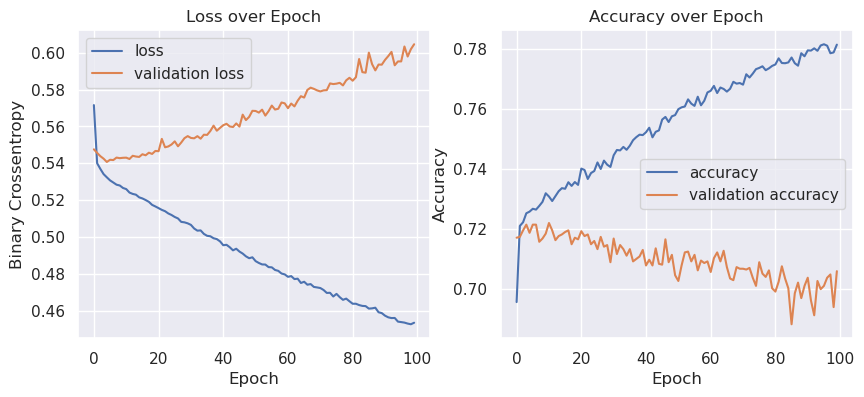

192/192 [==============================] - 0s 880us/step - loss: 0.6152 - accuracy: 0.6986
63 nodes, dropout 0.8, lr 0.01, batch size 32, epochs 100


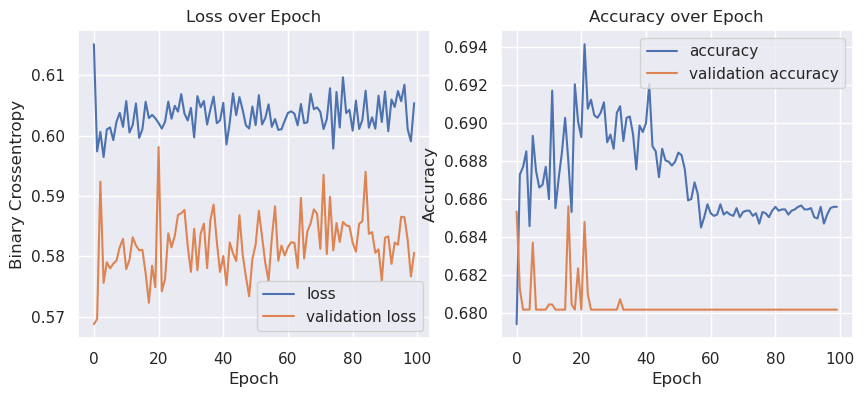

192/192 [==============================] - 0s 884us/step - loss: 0.5781 - accuracy: 0.6800
63 nodes, dropout 0.8, lr 0.01, batch size 64, epochs 100


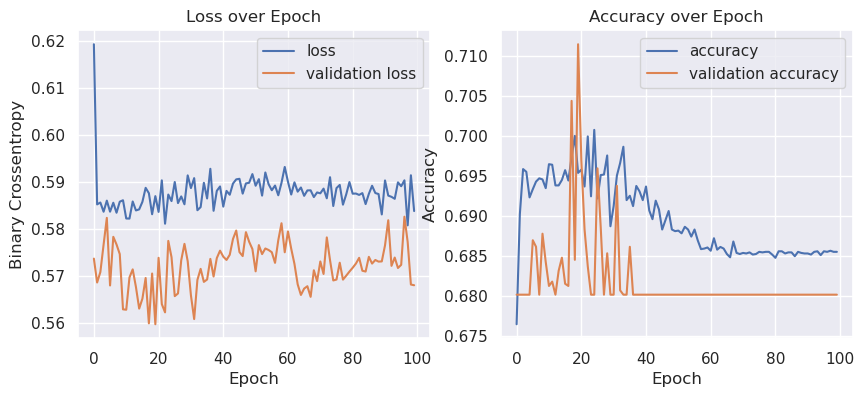

192/192 [==============================] - 0s 902us/step - loss: 0.5634 - accuracy: 0.6800
63 nodes, dropout 0.8, lr 0.01, batch size 128, epochs 100


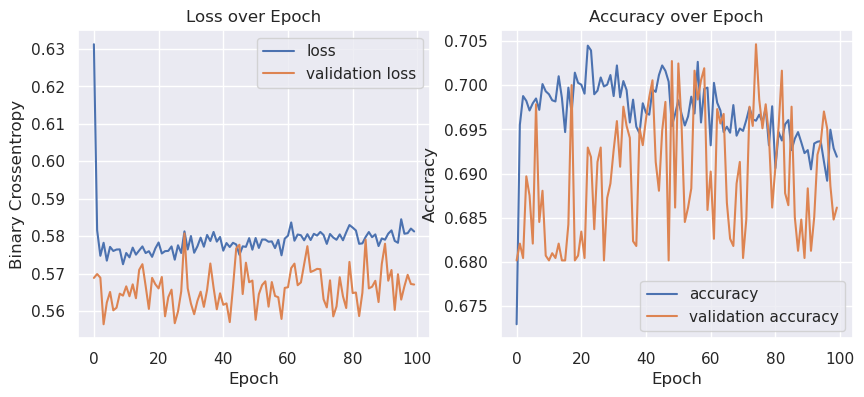

192/192 [==============================] - 0s 970us/step - loss: 0.5694 - accuracy: 0.6864
63 nodes, dropout 0.8, lr 0.005, batch size 32, epochs 100


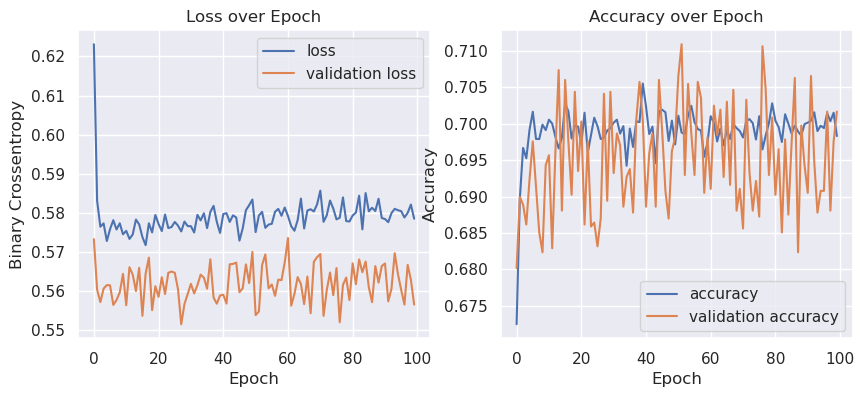

192/192 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.7015
63 nodes, dropout 0.8, lr 0.005, batch size 64, epochs 100


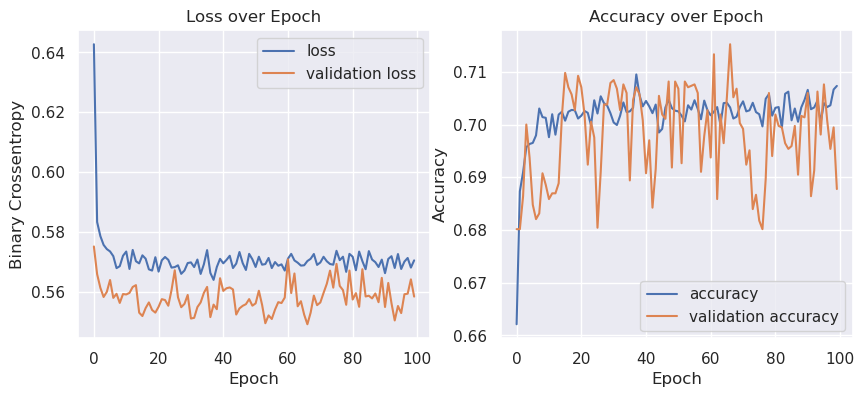

192/192 [==============================] - 0s 891us/step - loss: 0.5589 - accuracy: 0.6870
63 nodes, dropout 0.8, lr 0.005, batch size 128, epochs 100


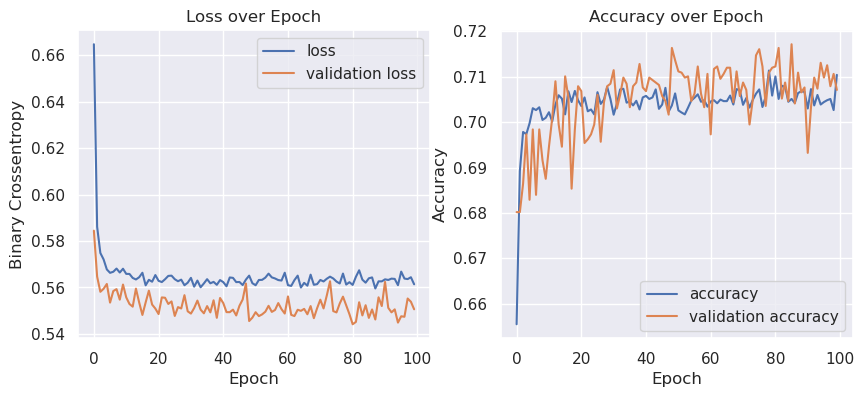

192/192 [==============================] - 0s 878us/step - loss: 0.5528 - accuracy: 0.7063
63 nodes, dropout 0.8, lr 0.001, batch size 32, epochs 100


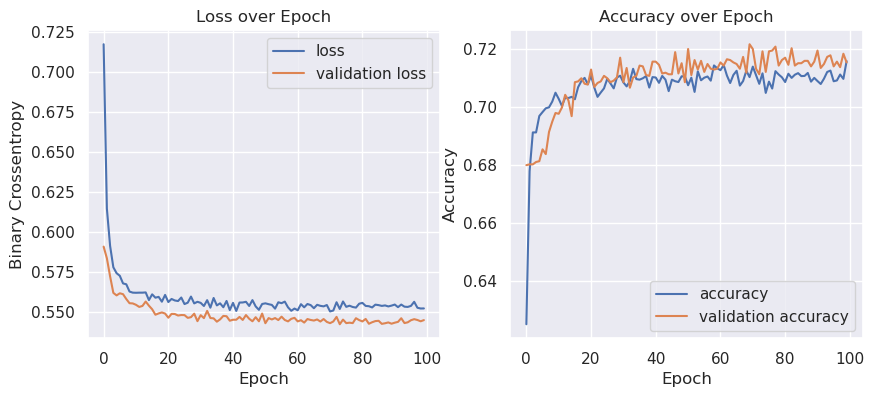

192/192 [==============================] - 0s 888us/step - loss: 0.5462 - accuracy: 0.7156
63 nodes, dropout 0.8, lr 0.001, batch size 64, epochs 100


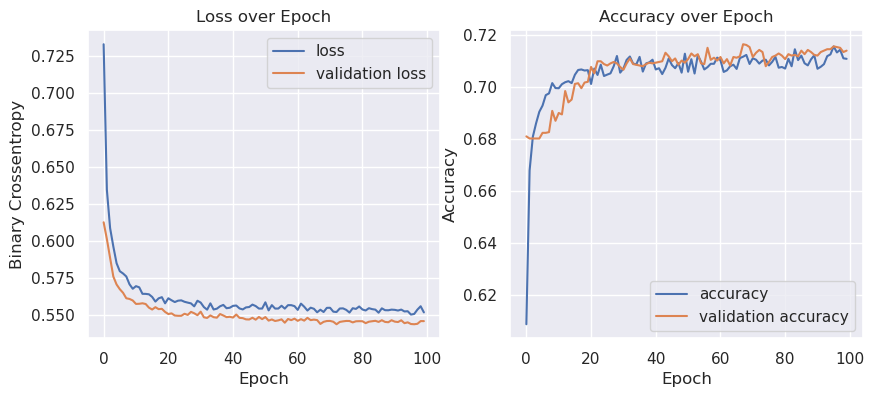

192/192 [==============================] - 0s 876us/step - loss: 0.5467 - accuracy: 0.7126
63 nodes, dropout 0.8, lr 0.001, batch size 128, epochs 100


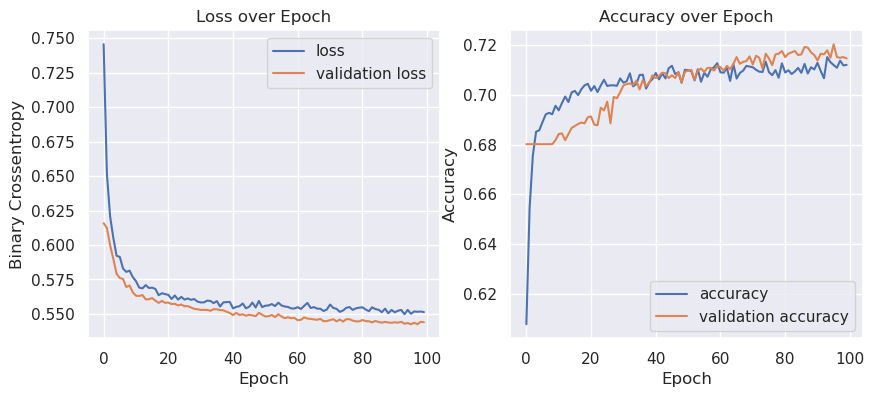

192/192 [==============================] - 0s 912us/step - loss: 0.5462 - accuracy: 0.7157


In [114]:
# I used this before I wrote the function
# # now we need to train it
# # tensorflow keeps track of histry- which is cool because we can use that to plot the results
# history = nn_model.fit(
#     # tensorflow uses
#     x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0 # if you dont want to see the printed data, comment this out
# )

# now we can call the function with the parameters we want
# keep track of least loss data and model
least_val_loss = float('inf')
least_loss_model = None
# do this 100 times
epochs = 100
# set values for the parameters in the train model function
for num_nodes in [16, 32, 63]:
  for dropout_prob in [0, 0.8]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        # print details just so we can see it
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}, epochs {epochs}")
        # train the model
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        # call the plot function to visualize
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        # check for least loss, keep track of model and data
        if val_loss < least_val_loss:
            least_val_loss = val_loss
            least_loss_model = model
        
        
        # if val_loss[0] < least_val_loss:
        #   least_val_loss = val_loss[0]
        #   least_lost_model = model
        #   break

In [119]:
# take the least_loss_model we found and use it to test
y_pred = least_loss_model.predict(x_test)
# cast as int (o or 1) and reshape into a column
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

192/192 [==============================] - 0s 839us/step


array([0, 0, 0, ..., 0, 0, 1])

In [120]:
# rerun classification report based on neural network output
# dropout rate is 0.2
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      4194
           1       0.64      0.24      0.35      1935

    accuracy                           0.72      6129
   macro avg       0.68      0.59      0.58      6129
weighted avg       0.70      0.72      0.67      6129



In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      4194
           1       0.64      0.24      0.35      1935

    accuracy                           0.72      6129
   macro avg       0.68      0.59      0.58      6129
weighted avg       0.70      0.72      0.67      6129



### Evaluation of Neural Network

Overall, the neural network is the best fit with the best precision for both passing and failing scores. It seems that the neural network model is better at predicting the class 0 (failing) than class 1 (passing). This was true in the KNN model as well. The neural network has high precision and recall for the class 0, indicating that when the model predicts class 0, it is often correct and can identify most of the true class 0 instances. However, the precision and recall for the positive class are lower, suggesting that the model struggles to accurately predict class 1 and misses a significant portion of true class 1 instances. 

# Discussion and Conclusion

## Takeaways

Ultimately, this project produced somewhat different results than I anticipated. During the EDA, I realized that each output variable had a high Chi square score for different features. I thought they would be the same. However, math correlated with the gender and lunch type, reading correllated with number of siblings, and writing correlated with gender. I didn't realize how large of a role the gender variable would play in models predicting scores. Althpugh I correctly hypothesized after my initial analysis that other testing scores and being first born would have a large influence, I thought that parent education would have a larger influence for all three outputs. 

Overall, it appears that males have higher math scores, while females have higher writing scores. The biggest influences on higher scores for all three (math, reading, and writing) is test prep. Across the board, students who spent more time prepping had a higher chance at passing. 

An interesting aspect that I noticed was that students with higher numbers of siblings tended to have higher passing scores. This could be because older siblings are helping younger read or reading with them. Or because parents are already reading at home with siblings. But, I am assuming this based on my point of view as a teacher, not as a data scientist. I think this data could be used to assess need for student study groups and test prep courses or after school events. 

## Discussion of Results

The results of the KNN were not as good as I had hoped. The model made great predictions on students who fail, but it was less likely to predict a student who would pass. By hypertuning the number of K to prevent overfitting, I thought I could prevent this, but this was not the case. The data is not imbalanced; there is an equal number of passing grades to failing grades. I think KNN is just not the best choice of a model for this amount of features. The model with the best performance is the Neural Network. I think this is because neural network can easily sort through complex relationships to learn patterns. With a dataset as large as this one and with so many features, the neural network was able to make more accurate predictions than the KNN and the Naive Bayes Classifier. 

## Ways to Improve 

To improve, I think I could use bagging and boosting methods. By combing the predictions of multiple base models through bootstraping, I could train multiple models on different subsets of the training data and aggregate to find the prediction.

## What I Learned

Completing this poject was fun (and incredibly time consuming), and I found the machine learning aspects very intriguing. Learning how to write neural network models for prediction was my favorite part as it allowed me to research Python libraries like Tensorflow to understand how the models use several layers to connect nodes (not unlike the human brain).

I also enjoyed learning how to use Pandas and Seaborne to manipulate the data and visualize it. Making the visualization is tremendously helpful for me to make initial analyses.